In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터셋 불러오기
customer = pd.read_csv('/content/drive/MyDrive/customer.csv')
product = pd.read_csv('/content/drive/MyDrive/product.csv', on_bad_lines='skip')
transaction = pd.read_csv('/content/drive/MyDrive/transaction_new.csv')
click = pd.read_csv('/content/drive/MyDrive/click_stream_new.csv')
click_tt = pd.read_csv('/content/drive/MyDrive/click_tt.csv')

In [ ]:
click_tt

,event_time,event_id,session_id,used
0,2022-07-24 13:16:37.038087+00:00,e599d7c6-cc51-407b-b8c5-20545cce6cbd,00007415-e0e7-4a33-95e8-5bc749016876,1
1,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0000b1a6-8dca-4fb3-b1db-ccde1791a330,1
2,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,00011e77-643b-49ba-b09d-c5a64f7683b4,1
3,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1
4,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1
...,...,...,...,...
224877,2017-12-25 14:25:43.431409+00:00,2096555f-2df5-4ac4-9842-0f3de89e14f9,ffff153d-ae1f-4fe2-af05-f2803580b5e4,1
224878,2017-03-30 03:05:32.013557+00:00,3bfe6884-fc57-480f-85f1-b9cb23740a43,ffff284a-9364-4296-a758-e3b0b4297f6d,1
224879,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1
224880,2020-11-07 18:03:13.117552+00:00,cb250f48-5ee9-40c7-a8a8-b54a9a357def,ffffdf8e-dea1-42bc-9839-7662675c0d38,1


In [ ]:
# 사용자 세션 데이터셋 미리보기
click

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


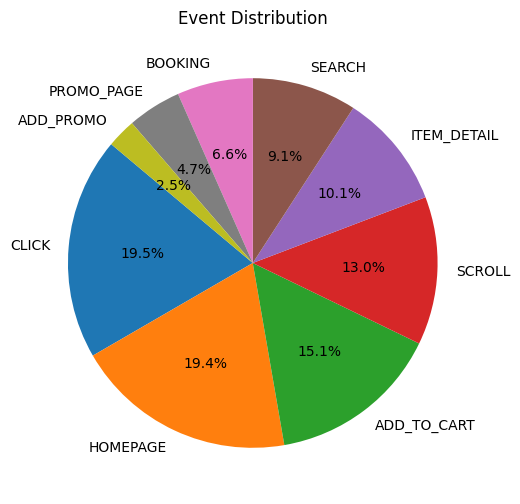

In [ ]:
# 'event_name' 열 값의 빈도 계산
event_counts = click['event_name'].value_counts()

# 이벤트 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Event Distribution")
plt.show()

In [ ]:
# 전체 세션 수 확인
click.session_id.nunique()

895203

In [ ]:
'''
from itertools import combinations

# 필터링할 이벤트 목록
target_events = ['HOMEPAGE', 'CLICK', 'SCROLL', 'PROMO_PAGE']

# 모든 이벤트 조합을 생성합니다.
all_event_combinations = []
for r in range(1, len(target_events) + 1):
    event_combinations = list(combinations(target_events, r))
    all_event_combinations.extend(event_combinations)

# 데이터셋을 'session_id'로 그룹화합니다.
grouped_data = click.groupby('session_id')

# 조건에 맞는 그룹을 찾습니다.
selected_groups = []
for session_id, group_data in grouped_data:
    # 그룹 내에서 'event_name' 컬럼의 고유값을 확인합니다.
    unique_events = group_data['event_name'].unique()

    # 이 그룹의 이벤트 조합이 all_event_combinations에 포함되고, 다른 이벤트도 포함되지 않는지 확인합니다.
    if any(set(event_combination).issubset(unique_events) for event_combination in all_event_combinations):
        if not any(event for event in unique_events if event not in target_events):
            selected_groups.append(session_id)

# 결과 출력
print(len(selected_groups))
'''

"\nfrom itertools import combinations\n\n# 필터링할 이벤트 목록\ntarget_events = ['HOMEPAGE', 'CLICK', 'SCROLL', 'PROMO_PAGE']\n\n# 모든 이벤트 조합을 생성합니다.\nall_event_combinations = []\nfor r in range(1, len(target_events) + 1):\n    event_combinations = list(combinations(target_events, r))\n    all_event_combinations.extend(event_combinations)\n\n# 데이터셋을 'session_id'로 그룹화합니다.\ngrouped_data = click.groupby('session_id')\n\n# 조건에 맞는 그룹을 찾습니다.\nselected_groups = []\nfor session_id, group_data in grouped_data:\n    # 그룹 내에서 'event_name' 컬럼의 고유값을 확인합니다.\n    unique_events = group_data['event_name'].unique()\n\n    # 이 그룹의 이벤트 조합이 all_event_combinations에 포함되고, 다른 이벤트도 포함되지 않는지 확인합니다.\n    if any(set(event_combination).issubset(unique_events) for event_combination in all_event_combinations):\n        if not any(event for event in unique_events if event not in target_events):\n            selected_groups.append(session_id)\n\n# 결과 출력\nprint(len(selected_groups))\n"

In [ ]:
# 사용자 세션 데이터셋 미리보기
transaction

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


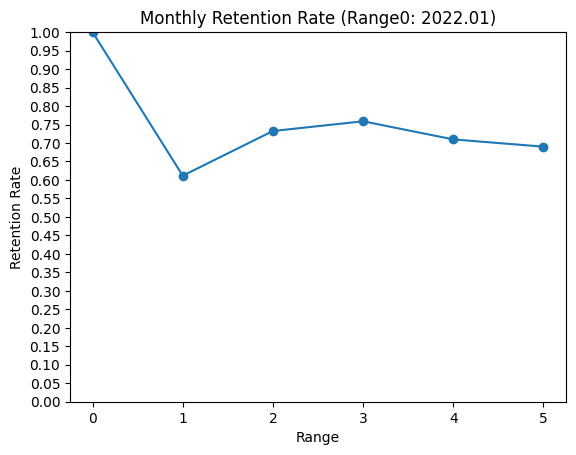

In [ ]:
# 데이터 프레임 df와 'created_at' 컬럼이 있다고 가정합니다.
transaction["created_at"] = pd.to_datetime(transaction["created_at"])
df = transaction

# 2022년 1월에 첫 접속한 'customer_id' 추출 (Range 0)
range0_customers = df[df['created_at'].between('2022-01-01', '2022-01-31', inclusive='both')]['customer_id'].unique()

# 각 Range에 대한 리텐션 계산
retention_rates = []
for i in range(1, 7):  # 1월부터 6월까지의 Range
    start_date = pd.Timestamp(f'2022-{i:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)

    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_customers)) / len(range0_customers)
    retention_rates.append(retention_rate)

# 시각화
range_label = ['0', '1', '2', '3', '4', '5']
plt.plot(range_label, retention_rates, marker='o')
plt.xlabel('Range')
plt.ylabel('Retention Rate')
plt.title('Monthly Retention Rate (Range0: 2022.01)')
plt.ylim(0, 1)  # Retention Rate의 범위는 0~1 사이
plt.yticks([i/20 for i in range(21)])
plt.show()

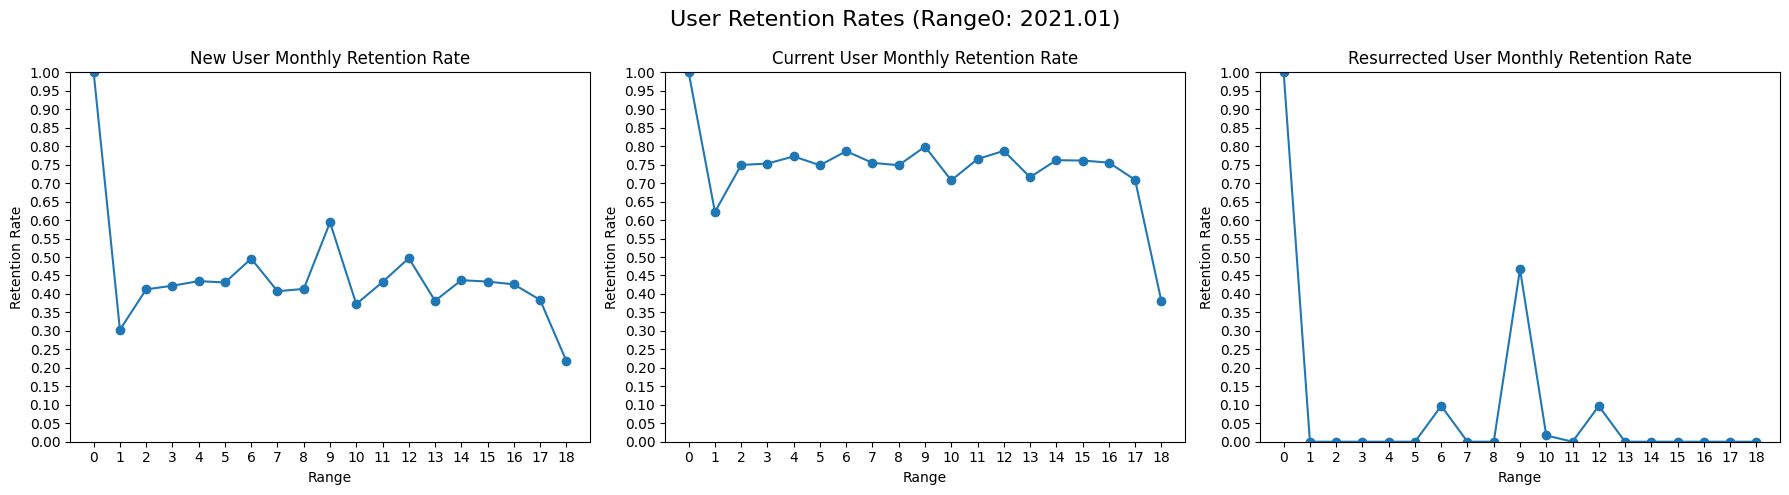

In [ ]:
#############################################################################
############################## 1월 유저 리텐션 ##############################
#############################################################################

# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
range_label = list(range(19))

# 1. 신규 유저 리텐션
ax1 = axes[0]
range0_customers = df[df['created_at'].between('2021-01-01', '2021-01-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2020-12-31', inclusive='both')]['customer_id'].unique()
range0_new_customers = [customer_id for customer_id in range0_customers if customer_id not in previous_month_customers]
retention_rates = []
for i in range(1, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_new_customers)) / len(range0_new_customers)
    retention_rates.append(retention_rate)
ax1.plot(range_label, retention_rates, marker='o')
ax1.set_xlabel('Range')
ax1.set_ylabel('Retention Rate')
ax1.set_title('New User Monthly Retention Rate')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/20 for i in range(21)])

# 2. 현재 유저 리텐션
ax2 = axes[1]
january_customers = df[df['created_at'].between('2020-07-01', '2020-12-31', inclusive='both')]['customer_id'].unique()
range0_current_customers = [customer_id for customer_id in range0_customers if customer_id in january_customers]
retention_rates = []
for i in range(1, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_current_customers)) / len(range0_current_customers)
    retention_rates.append(retention_rate)
ax2.plot(range_label, retention_rates, marker='o')
ax2.set_xlabel('Range')
ax2.set_ylabel('Retention Rate')
ax2.set_title('Current User Monthly Retention Rate')
ax2.set_ylim(0, 1)
ax2.set_yticks([i/20 for i in range(21)])

# 3. 복귀 유저 리텐션
ax3 = axes[2]
range0_existing_customers = [customer_id for customer_id in range0_customers if customer_id in previous_month_customers]
range0_resurrected_customers = [customer_id for customer_id in range0_existing_customers if customer_id not in january_customers]
retention_rates = []
for i in range(1, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_resurrected_customers)) / len(range0_resurrected_customers)
    retention_rates.append(retention_rate)
ax3.plot(range_label, retention_rates, marker='o')
ax3.set_xlabel('Range')
ax3.set_ylabel('Retention Rate')
ax3.set_title('Resurrected User Monthly Retention Rate')
ax3.set_ylim(0, 1)
ax3.set_yticks([i/20 for i in range(21)])

ax1.set_xticks(range_label)
ax2.set_xticks(range_label)
ax3.set_xticks(range_label)

# 전체 그래프의 타이틀 설정
fig.suptitle('User Retention Rates (Range0: 2021.01)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

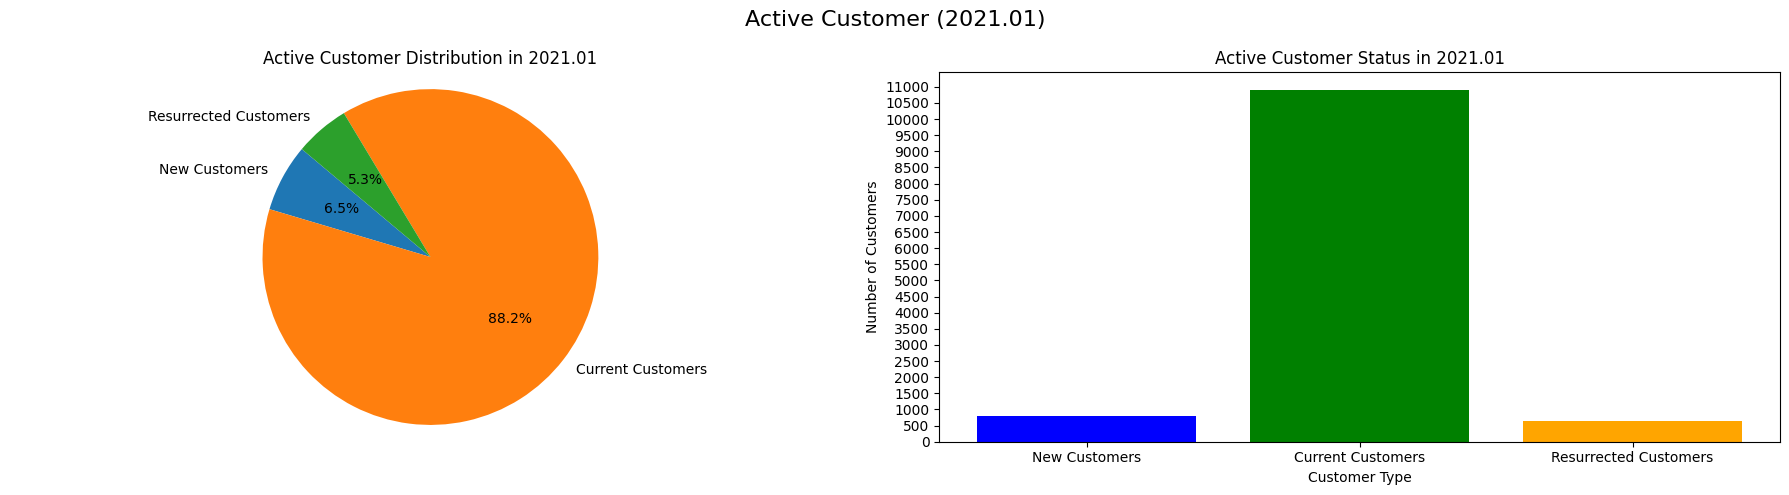

In [ ]:
# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# 비율 계산
total_customers_2101 = len(range0_new_customers) + len(range0_current_customers) + len(range0_resurrected_customers)
new_ratio = len(range0_new_customers) / total_customers_2101
current_ratio = len(range0_current_customers) / total_customers_2101
resurrected_ratio = len(range0_resurrected_customers) / total_customers_2101

# 비율 시각화 (첫 번째 서브플롯)
ratios = [new_ratio, current_ratio, resurrected_ratio]
labels = ['New Customers', 'Current Customers', 'Resurrected Customers']
axes[0].pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Active Customer Distribution in 2021.01')

# 데이터 준비 및 그래프 생성 (두 번째 서브플롯)
categories = ['New Customers', 'Current Customers', 'Resurrected Customers']
customer_counts = [len(range0_new_customers), len(range0_current_customers), len(range0_resurrected_customers)]
axes[1].bar(categories, customer_counts, color=['blue', 'green', 'orange'])
axes[1].set_title('Active Customer Status in 2021.01')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Customers')
axes[1].yaxis.set_major_locator(plt.MultipleLocator(base=500))  # y축 눈금 설정

# 전체 그래프의 타이틀 설정
fig.suptitle('Active Customer (2021.01)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()


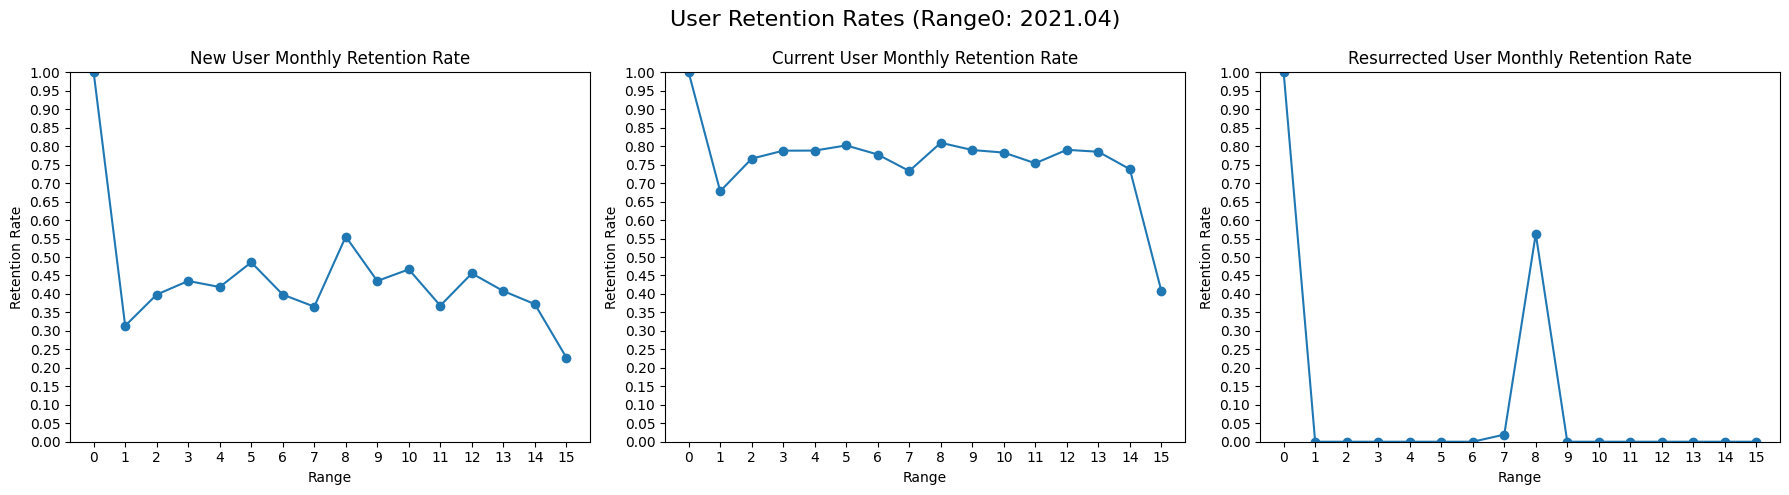

In [ ]:
#############################################################################
############################## 4월 유저 리텐션 ##############################
#############################################################################

# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
range_label = list(range(16))

# 1. 신규 유저 리텐션
ax1 = axes[0]
range0_customers = df[df['created_at'].between('2021-04-01', '2021-04-30', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2021-03-31', inclusive='both')]['customer_id'].unique()
range0_new_customers = [customer_id for customer_id in range0_customers if customer_id not in previous_month_customers]
retention_rates = []
for i in range(4, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_new_customers)) / len(range0_new_customers)
    retention_rates.append(retention_rate)
ax1.plot(range_label, retention_rates, marker='o')
ax1.set_xlabel('Range')
ax1.set_ylabel('Retention Rate')
ax1.set_title('New User Monthly Retention Rate')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/20 for i in range(21)])

# 2. 현재 유저 리텐션
ax2 = axes[1]
range0_customers = df[df['created_at'].between('2021-04-01', '2021-04-30', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2020-10-01', '2021-03-31', inclusive='both')]['customer_id'].unique()
range0_current_customers = [customer_id for customer_id in range0_customers if customer_id in january_customers]
retention_rates = []
for i in range(4, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_current_customers)) / len(range0_current_customers)
    retention_rates.append(retention_rate)
ax2.plot(range_label, retention_rates, marker='o')
ax2.set_xlabel('Range')
ax2.set_ylabel('Retention Rate')
ax2.set_title('Current User Monthly Retention Rate')
ax2.set_ylim(0, 1)
ax2.set_yticks([i/20 for i in range(21)])

# 3. 복귀 유저 리텐션
ax3 = axes[2]
range0_customers = df[df['created_at'].between('2021-04-01', '2021-04-30', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2020-10-01', '2021-03-31', inclusive='both')]['customer_id'].unique()
range0_existing_customers = [customer_id for customer_id in range0_customers if customer_id in previous_month_customers]
range0_resurrected_customers = [customer_id for customer_id in range0_existing_customers if customer_id not in january_customers]
retention_rates = []
for i in range(4, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_resurrected_customers)) / len(range0_resurrected_customers)
    retention_rates.append(retention_rate)
ax3.plot(range_label, retention_rates, marker='o')
ax3.set_xlabel('Range')
ax3.set_ylabel('Retention Rate')
ax3.set_title('Resurrected User Monthly Retention Rate')
ax3.set_ylim(0, 1)
ax3.set_yticks([i/20 for i in range(21)])

ax1.set_xticks(range_label)
ax2.set_xticks(range_label)
ax3.set_xticks(range_label)

# 전체 그래프의 타이틀 설정
fig.suptitle('User Retention Rates (Range0: 2021.04)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

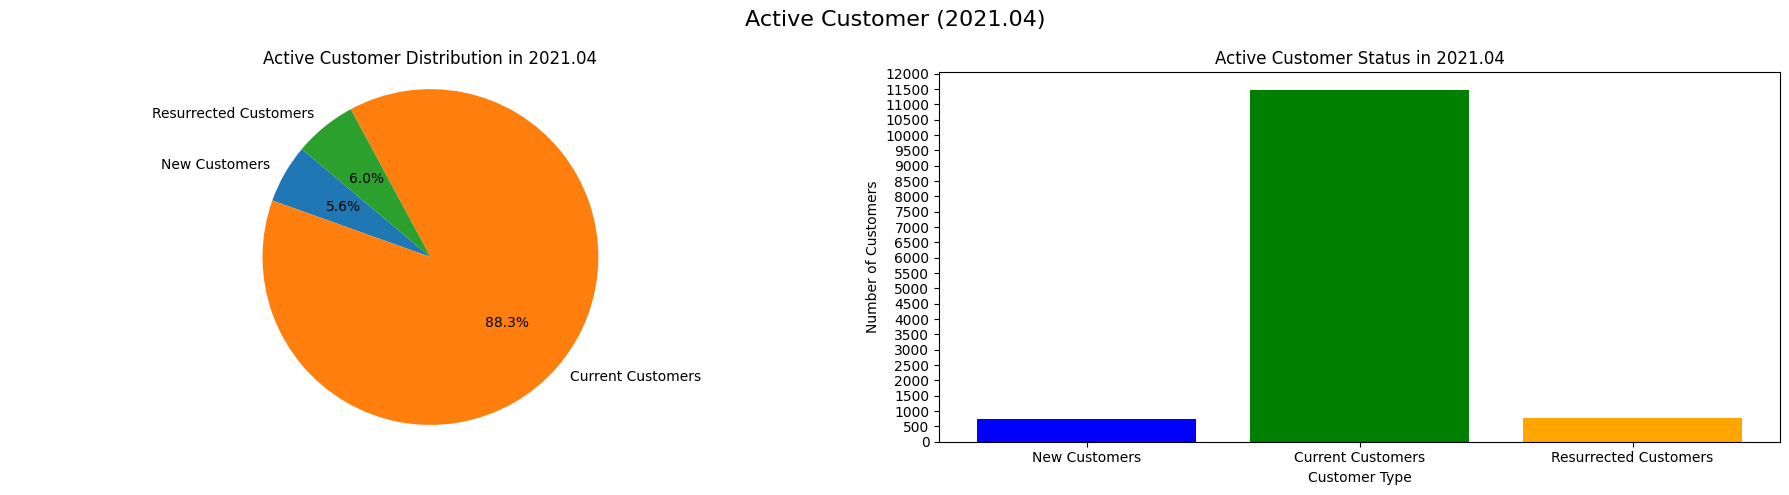

In [ ]:
# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# 비율 계산
total_customers_2104 = len(range0_new_customers) + len(range0_current_customers) + len(range0_resurrected_customers)
new_ratio = len(range0_new_customers) / total_customers_2104
current_ratio = len(range0_current_customers) / total_customers_2104
resurrected_ratio = len(range0_resurrected_customers) / total_customers_2104

# 비율 시각화 (첫 번째 서브플롯)
ratios = [new_ratio, current_ratio, resurrected_ratio]
labels = ['New Customers', 'Current Customers', 'Resurrected Customers']
axes[0].pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Active Customer Distribution in 2021.04')

# 데이터 준비 및 그래프 생성 (두 번째 서브플롯)
categories = ['New Customers', 'Current Customers', 'Resurrected Customers']
customer_counts = [len(range0_new_customers), len(range0_current_customers), len(range0_resurrected_customers)]
axes[1].bar(categories, customer_counts, color=['blue', 'green', 'orange'])
axes[1].set_title('Active Customer Status in 2021.04')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Customers')
axes[1].yaxis.set_major_locator(plt.MultipleLocator(base=500))  # y축 눈금 설정

# 전체 그래프의 타이틀 설정
fig.suptitle('Active Customer (2021.04)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

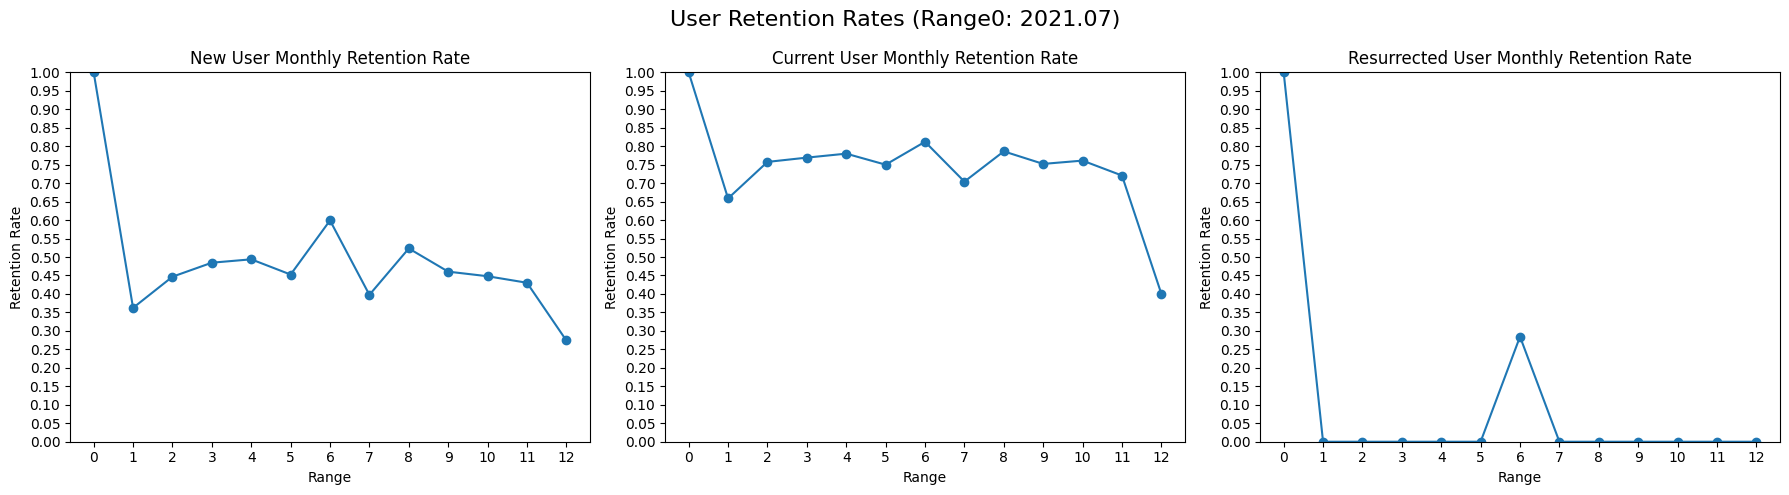

In [ ]:
#############################################################################
############################## 7월 유저 리텐션 ##############################
#############################################################################

# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
range_label = list(range(13))

# 1. 신규 유저 리텐션
ax1 = axes[0]
range0_customers = df[df['created_at'].between('2021-07-01', '2021-07-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2021-06-30', inclusive='both')]['customer_id'].unique()
range0_new_customers = [customer_id for customer_id in range0_customers if customer_id not in previous_month_customers]
retention_rates = []
for i in range(7, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_new_customers)) / len(range0_new_customers)
    retention_rates.append(retention_rate)
ax1.plot(range_label, retention_rates, marker='o')
ax1.set_xlabel('Range')
ax1.set_ylabel('Retention Rate')
ax1.set_title('New User Monthly Retention Rate')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/20 for i in range(21)])

# 2. 현재 유저 리텐션
ax2 = axes[1]
range0_customers = df[df['created_at'].between('2021-07-01', '2021-07-31', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2021-01-01', '2021-06-30', inclusive='both')]['customer_id'].unique()
range0_current_customers = [customer_id for customer_id in range0_customers if customer_id in january_customers]
retention_rates = []
for i in range(7, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_current_customers)) / len(range0_current_customers)
    retention_rates.append(retention_rate)
ax2.plot(range_label, retention_rates, marker='o')
ax2.set_xlabel('Range')
ax2.set_ylabel('Retention Rate')
ax2.set_title('Current User Monthly Retention Rate')
ax2.set_ylim(0, 1)
ax2.set_yticks([i/20 for i in range(21)])

# 3. 복귀 유저 리텐션
ax3 = axes[2]
range0_customers = df[df['created_at'].between('2021-07-01', '2021-07-31', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2021-01-01', '2021-06-30', inclusive='both')]['customer_id'].unique()
range0_existing_customers = [customer_id for customer_id in range0_customers if customer_id in previous_month_customers]
range0_resurrected_customers = [customer_id for customer_id in range0_existing_customers if customer_id not in january_customers]
retention_rates = []
for i in range(7, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_resurrected_customers)) / len(range0_resurrected_customers)
    retention_rates.append(retention_rate)
ax3.plot(range_label, retention_rates, marker='o')
ax3.set_xlabel('Range')
ax3.set_ylabel('Retention Rate')
ax3.set_title('Resurrected User Monthly Retention Rate')
ax3.set_ylim(0, 1)
ax3.set_yticks([i/20 for i in range(21)])

ax1.set_xticks(range_label)
ax2.set_xticks(range_label)
ax3.set_xticks(range_label)

# 전체 그래프의 타이틀 설정
fig.suptitle('User Retention Rates (Range0: 2021.07)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

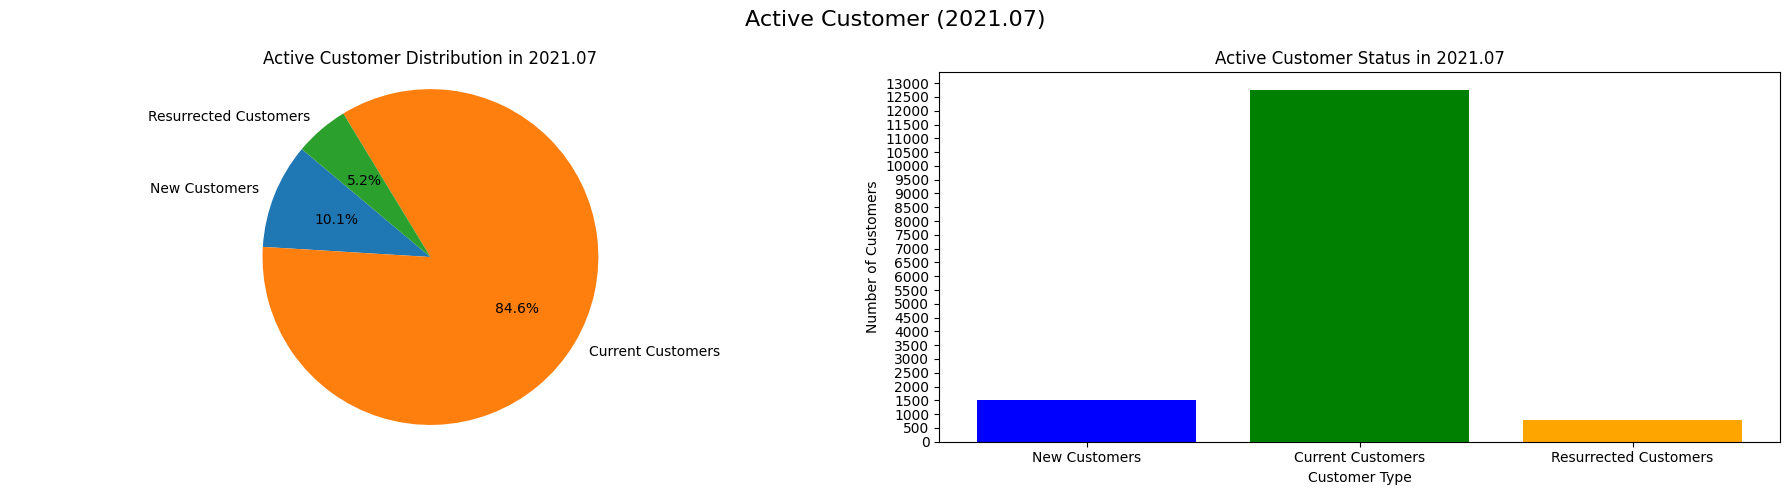

In [ ]:
# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# 비율 계산
total_customers_2107 = len(range0_new_customers) + len(range0_current_customers) + len(range0_resurrected_customers)
new_ratio = len(range0_new_customers) / total_customers_2107
current_ratio = len(range0_current_customers) / total_customers_2107
resurrected_ratio = len(range0_resurrected_customers) / total_customers_2107

# 비율 시각화 (첫 번째 서브플롯)
ratios = [new_ratio, current_ratio, resurrected_ratio]
labels = ['New Customers', 'Current Customers', 'Resurrected Customers']
axes[0].pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Active Customer Distribution in 2021.07')

# 데이터 준비 및 그래프 생성 (두 번째 서브플롯)
categories = ['New Customers', 'Current Customers', 'Resurrected Customers']
customer_counts = [len(range0_new_customers), len(range0_current_customers), len(range0_resurrected_customers)]
axes[1].bar(categories, customer_counts, color=['blue', 'green', 'orange'])
axes[1].set_title('Active Customer Status in 2021.07')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Customers')
axes[1].yaxis.set_major_locator(plt.MultipleLocator(base=500))  # y축 눈금 설정

# 전체 그래프의 타이틀 설정
fig.suptitle('Active Customer (2021.07)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

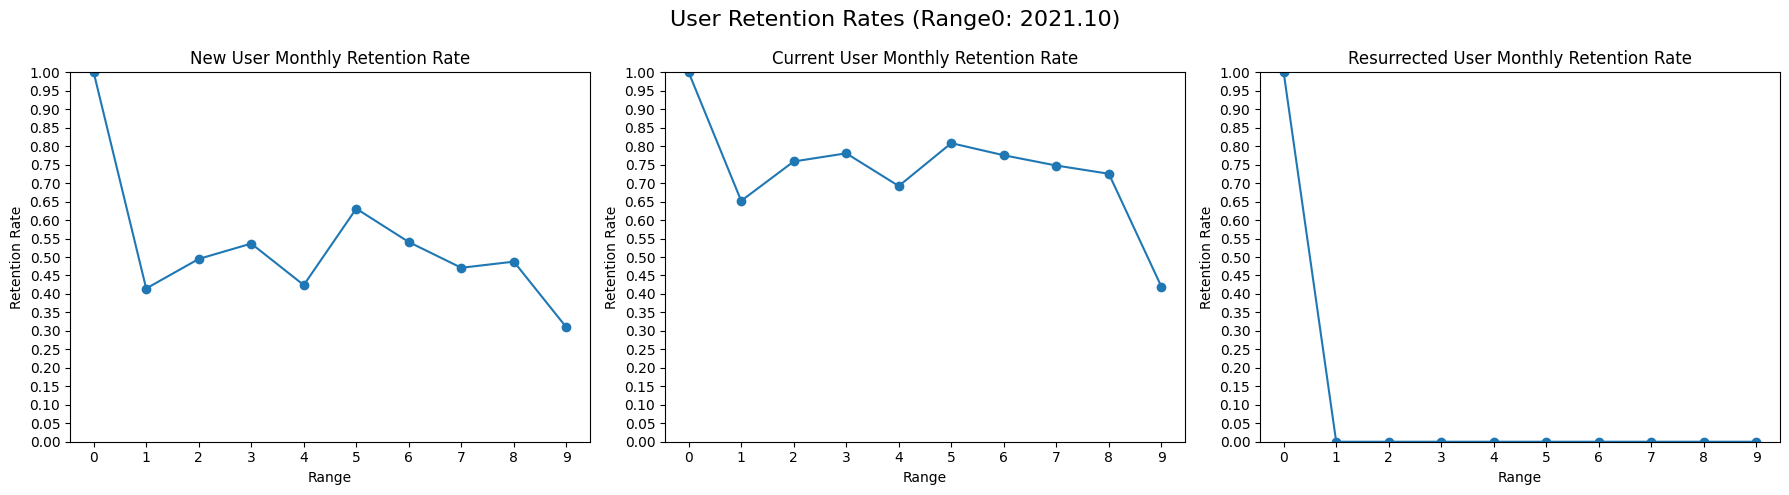

In [ ]:
#############################################################################
############################## 10월 유저 리텐션 ##############################
#############################################################################

# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
range_label=list(range(10))

# 1. 신규 유저 리텐션
ax1 = axes[0]
range0_customers = df[df['created_at'].between('2021-10-01', '2021-10-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2021-09-30', inclusive='both')]['customer_id'].unique()
range0_new_customers = [customer_id for customer_id in range0_customers if customer_id not in previous_month_customers]
retention_rates = []
for i in range(10, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_new_customers)) / len(range0_new_customers)
    retention_rates.append(retention_rate)
ax1.plot(range_label, retention_rates, marker='o')
ax1.set_xlabel('Range')
ax1.set_ylabel('Retention Rate')
ax1.set_title('New User Monthly Retention Rate')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/20 for i in range(21)])

# 2. 현재 유저 리텐션
ax2 = axes[1]
range0_customers = df[df['created_at'].between('2021-10-01', '2021-10-31', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2021-01-01', '2021-09-30', inclusive='both')]['customer_id'].unique()
range0_current_customers = [customer_id for customer_id in range0_customers if customer_id in january_customers]
retention_rates = []
for i in range(10, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_current_customers)) / len(range0_current_customers)
    retention_rates.append(retention_rate)
ax2.plot(range_label, retention_rates, marker='o')
ax2.set_xlabel('Range')
ax2.set_ylabel('Retention Rate')
ax2.set_title('Current User Monthly Retention Rate')
ax2.set_ylim(0, 1)
ax2.set_yticks([i/20 for i in range(21)])

# 3. 복귀 유저 리텐션
ax3 = axes[2]
range0_customers = df[df['created_at'].between('2021-10-01', '2021-10-31', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2021-01-01', '2021-09-30', inclusive='both')]['customer_id'].unique()
range0_existing_customers = [customer_id for customer_id in range0_customers if customer_id in previous_month_customers]
range0_resurrected_customers = [customer_id for customer_id in range0_existing_customers if customer_id not in january_customers]
retention_rates = []
for i in range(10, 20):
    year = 2021 if i <= 12 else 2022
    month = i if i <= 12 else i - 12
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_resurrected_customers)) / len(range0_resurrected_customers)
    retention_rates.append(retention_rate)
ax3.plot(range_label, retention_rates, marker='o')
ax3.set_xlabel('Range')
ax3.set_ylabel('Retention Rate')
ax3.set_title('Resurrected User Monthly Retention Rate')
ax3.set_ylim(0, 1)
ax3.set_yticks([i/20 for i in range(21)])

ax1.set_xticks(range_label)
ax2.set_xticks(range_label)
ax3.set_xticks(range_label)

# 전체 그래프의 타이틀 설정
fig.suptitle('User Retention Rates (Range0: 2021.10)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

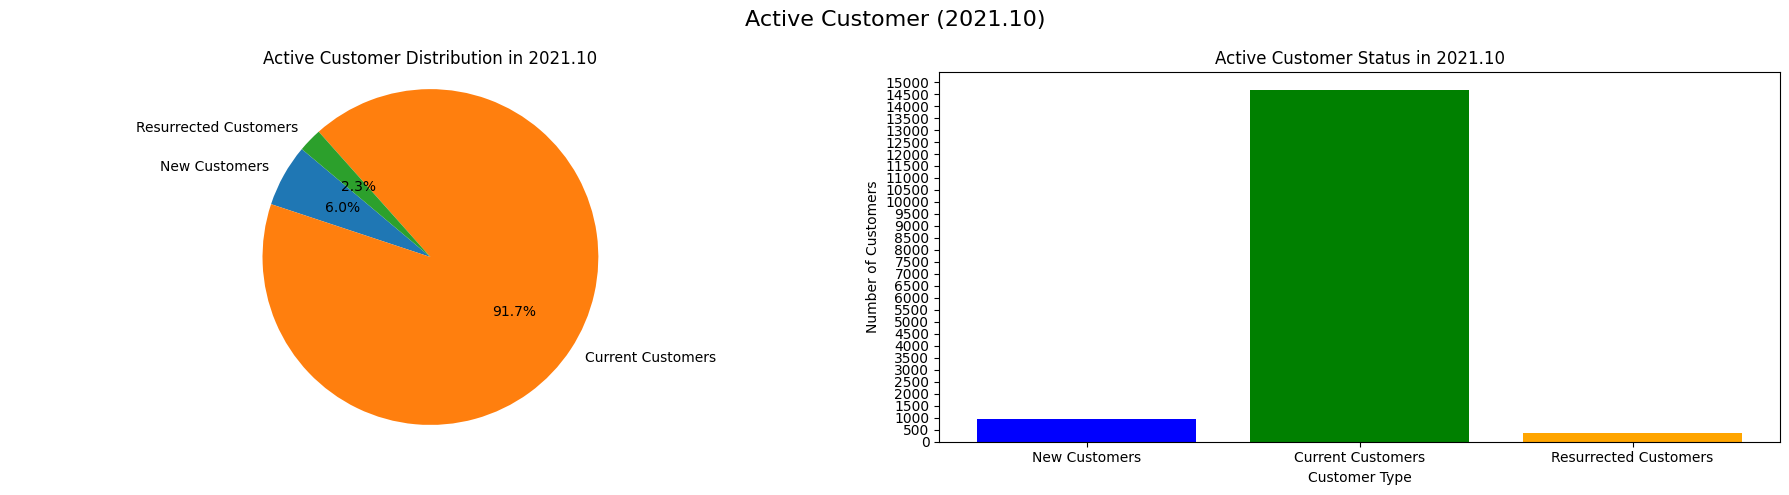

In [ ]:
# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# 비율 계산
total_customers_2110 = len(range0_new_customers) + len(range0_current_customers) + len(range0_resurrected_customers)
new_ratio = len(range0_new_customers) / total_customers_2110
current_ratio = len(range0_current_customers) / total_customers_2110
resurrected_ratio = len(range0_resurrected_customers) / total_customers_2110

# 비율 시각화 (첫 번째 서브플롯)
ratios = [new_ratio, current_ratio, resurrected_ratio]
labels = ['New Customers', 'Current Customers', 'Resurrected Customers']
axes[0].pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Active Customer Distribution in 2021.10')

# 데이터 준비 및 그래프 생성 (두 번째 서브플롯)
categories = ['New Customers', 'Current Customers', 'Resurrected Customers']
customer_counts = [len(range0_new_customers), len(range0_current_customers), len(range0_resurrected_customers)]
axes[1].bar(categories, customer_counts, color=['blue', 'green', 'orange'])
axes[1].set_title('Active Customer Status in 2021.10')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Customers')
axes[1].yaxis.set_major_locator(plt.MultipleLocator(base=500))  # y축 눈금 설정

# 전체 그래프의 타이틀 설정
fig.suptitle('Active Customer (2021.10)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

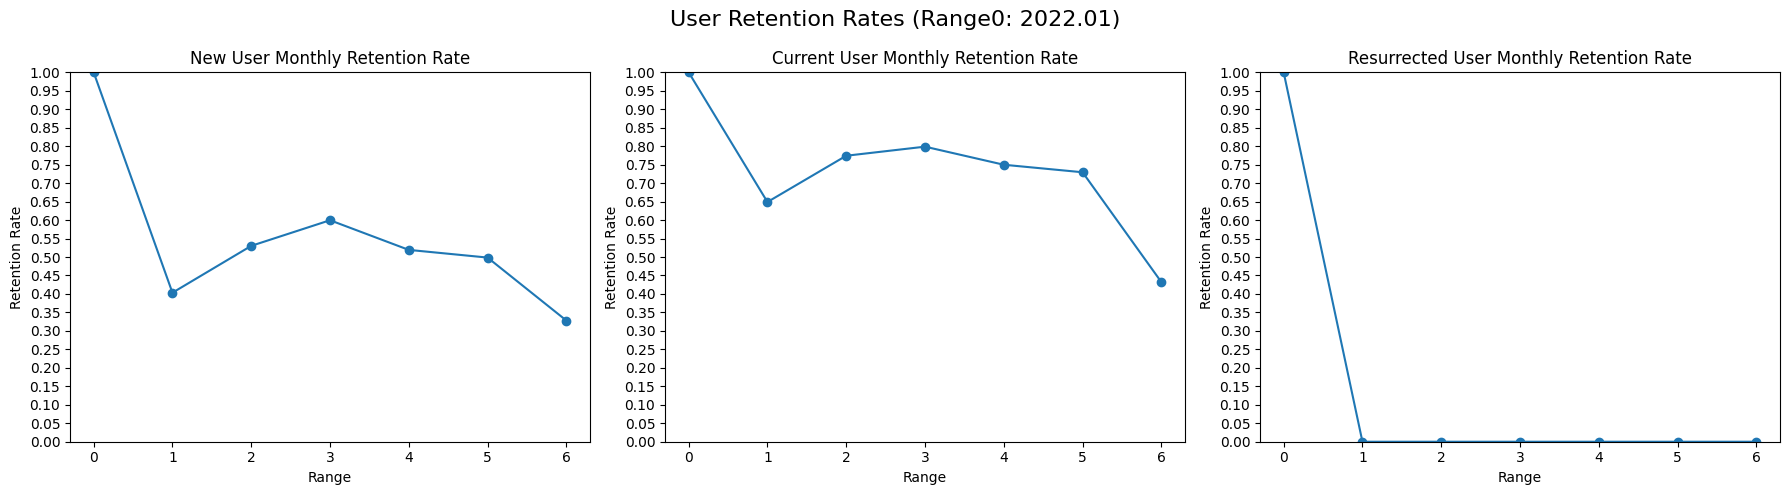

In [ ]:
#############################################################################
########################### 22년 1월 유저 리텐션 ############################
#############################################################################

# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
range_label=list(range(7))

# 1. 신규 유저 리텐션
ax1 = axes[0]
range0_customers = df[df['created_at'].between('2022-01-01', '2022-01-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2021-12-31', inclusive='both')]['customer_id'].unique()
range0_new_customers = [customer_id for customer_id in range0_customers if customer_id not in previous_month_customers]
retention_rates = []
for i in range(1, 8):
    year = 2022
    month = i
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_new_customers)) / len(range0_new_customers)
    retention_rates.append(retention_rate)
ax1.plot(range_label, retention_rates, marker='o')
ax1.set_xlabel('Range')
ax1.set_ylabel('Retention Rate')
ax1.set_title('New User Monthly Retention Rate')
ax1.set_ylim(0, 1)
ax1.set_yticks([i/20 for i in range(21)])

# 2. 현재 유저 리텐션
ax2 = axes[1]
range0_customers = df[df['created_at'].between('2022-01-01', '2022-01-31', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2021-07-01', '2021-12-31', inclusive='both')]['customer_id'].unique()
range0_current_customers = [customer_id for customer_id in range0_customers if customer_id in january_customers]
retention_rates = []
for i in range(1, 8):
    year = 2022
    month = i
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_current_customers)) / len(range0_current_customers)
    retention_rates.append(retention_rate)
ax2.plot(range_label, retention_rates, marker='o')
ax2.set_xlabel('Range')
ax2.set_ylabel('Retention Rate')
ax2.set_title('Current User Monthly Retention Rate')
ax2.set_ylim(0, 1)
ax2.set_yticks([i/20 for i in range(21)])

# 3. 복귀 유저 리텐션
ax3 = axes[2]
range0_customers = df[df['created_at'].between('2022-01-01', '2022-01-31', inclusive='both')]['customer_id'].unique()
january_customers = df[df['created_at'].between('2021-07-01', '2021-12-31', inclusive='both')]['customer_id'].unique()
range0_existing_customers = [customer_id for customer_id in range0_customers if customer_id in previous_month_customers]
range0_resurrected_customers = [customer_id for customer_id in range0_existing_customers if customer_id not in january_customers]
retention_rates = []
for i in range(1, 8):
    year = 2022
    month = i
    start_date = pd.Timestamp(f'{year}-{month:02d}-01', tz='UTC')
    end_date = start_date + pd.DateOffset(months=1)
    range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
    retention_rate = len(set(range_customers).intersection(range0_resurrected_customers)) / len(range0_resurrected_customers)
    retention_rates.append(retention_rate)
ax3.plot(range_label, retention_rates, marker='o')
ax3.set_xlabel('Range')
ax3.set_ylabel('Retention Rate')
ax3.set_title('Resurrected User Monthly Retention Rate')
ax3.set_ylim(0, 1)
ax3.set_yticks([i/20 for i in range(21)])

ax1.set_xticks(range_label)
ax2.set_xticks(range_label)
ax3.set_xticks(range_label)

# 전체 그래프의 타이틀 설정
fig.suptitle('User Retention Rates (Range0: 2022.01)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

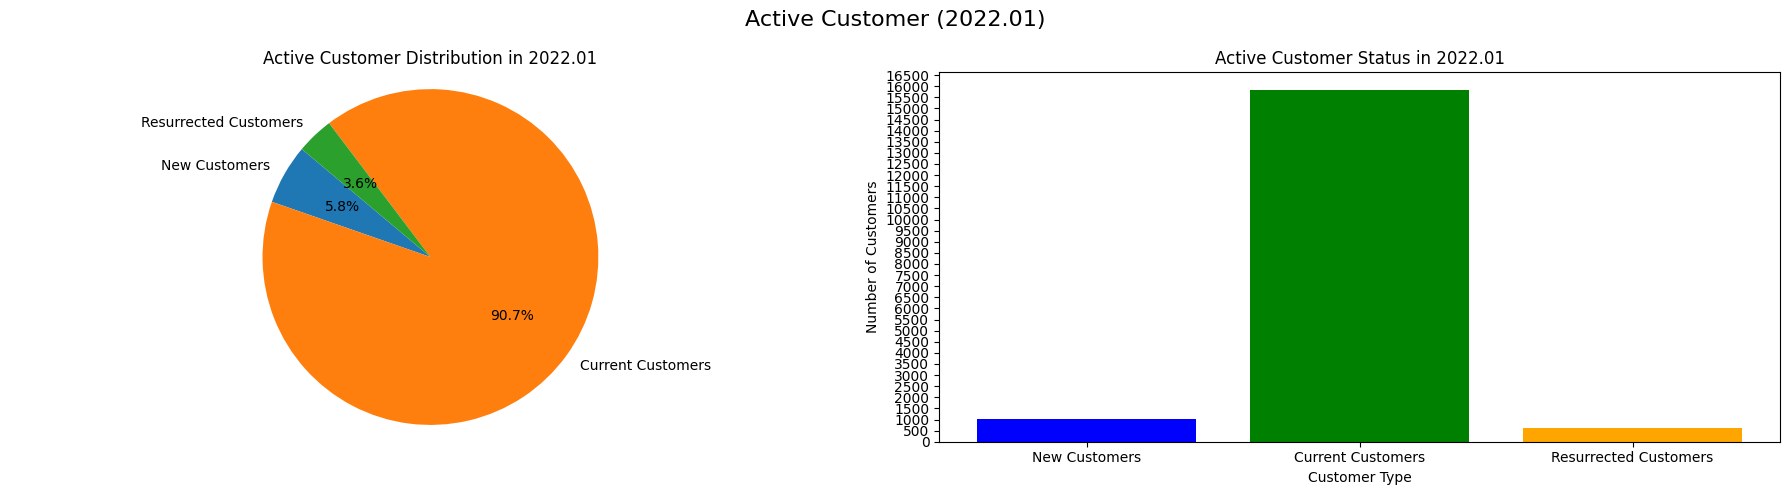

In [ ]:
# Subplot 준비
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# 비율 계산
total_customers_2201 = len(range0_new_customers) + len(range0_current_customers) + len(range0_resurrected_customers)
new_ratio = len(range0_new_customers) / total_customers_2201
current_ratio = len(range0_current_customers) / total_customers_2201
resurrected_ratio = len(range0_resurrected_customers) / total_customers_2201

# 비율 시각화 (첫 번째 서브플롯)
ratios = [new_ratio, current_ratio, resurrected_ratio]
labels = ['New Customers', 'Current Customers', 'Resurrected Customers']
axes[0].pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title('Active Customer Distribution in 2022.01')

# 데이터 준비 및 그래프 생성 (두 번째 서브플롯)
categories = ['New Customers', 'Current Customers', 'Resurrected Customers']
customer_counts = [len(range0_new_customers), len(range0_current_customers), len(range0_resurrected_customers)]
axes[1].bar(categories, customer_counts, color=['blue', 'green', 'orange'])
axes[1].set_title('Active Customer Status in 2022.01')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Number of Customers')
axes[1].yaxis.set_major_locator(plt.MultipleLocator(base=500))  # y축 눈금 설정

# 전체 그래프의 타이틀 설정
fig.suptitle('Active Customer (2022.01)', fontsize=16)

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

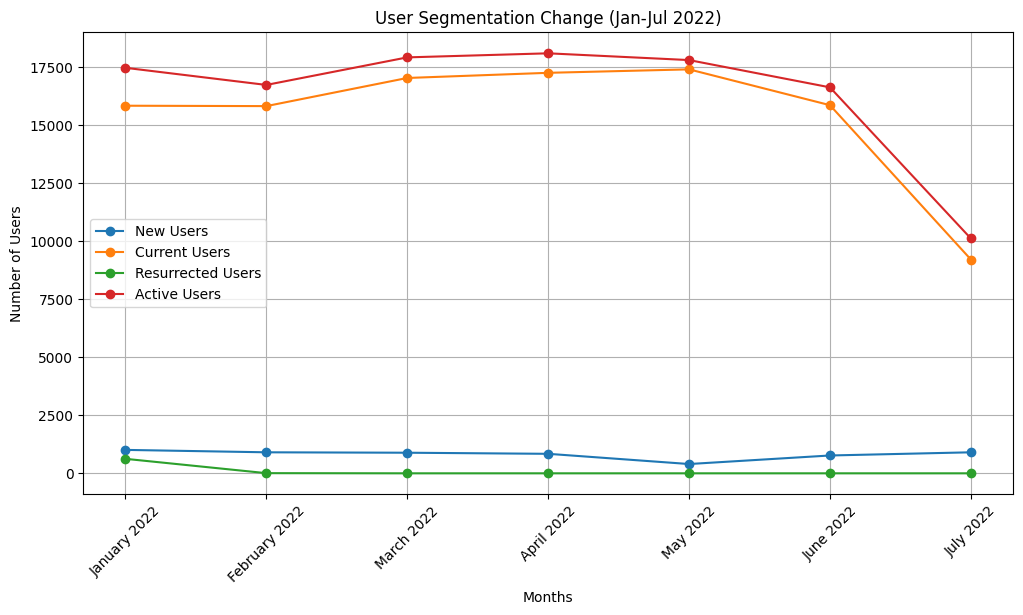

[1009, 905, 887, 840, 400, 768, 905]


In [ ]:
# 2022년 1월 데이터 처리
range0_customers_2201 = df[df['created_at'].between('2022-01-01', '2022-01-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2021-12-31', inclusive='both')]['customer_id'].unique()
range0_new_customers_2201 = [customer_id for customer_id in range0_customers_2201 if customer_id not in previous_month_customers]
new_customers_2201 = len(range0_new_customers_2201)

january_customers = df[df['created_at'].between('2021-07-01', '2021-12-31', inclusive='both')]['customer_id'].unique()
range0_current_customers_2201 = [customer_id for customer_id in range0_customers_2201 if customer_id in january_customers]
current_customers_2201 = len(range0_current_customers_2201)

range0_existing_customers_2201 = [customer_id for customer_id in range0_customers_2201 if customer_id in previous_month_customers]
range0_resurrected_customers_2201 = [customer_id for customer_id in range0_existing_customers_2201 if customer_id not in january_customers]
resurrected_customers_2201 = len(range0_resurrected_customers_2201)

total_customers_2201 = new_customers_2201 + current_customers_2201 + resurrected_customers_2201

# 2022년 2월 데이터 처리
range0_customers_2202 = df[df['created_at'].between('2022-02-01', '2022-02-28', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2022-01-31', inclusive='both')]['customer_id'].unique()
range0_new_customers_2202 = [customer_id for customer_id in range0_customers_2202 if customer_id not in previous_month_customers]
new_customers_2202 = len(range0_new_customers_2202)

january_customers = df[df['created_at'].between('2021-08-01', '2022-01-31', inclusive='both')]['customer_id'].unique()
range0_current_customers_2202 = [customer_id for customer_id in range0_customers_2202 if customer_id in january_customers]
current_customers_2202 = len(range0_current_customers_2202)

range0_existing_customers_2202 = [customer_id for customer_id in range0_customers_2202 if customer_id in previous_month_customers]
range0_resurrected_customers_2202 = [customer_id for customer_id in range0_existing_customers_2202 if customer_id not in january_customers]
resurrected_customers_2202 = len(range0_resurrected_customers_2202)

total_customers_2202 = new_customers_2202 + current_customers_2202 + resurrected_customers_2202

# 2022년 3월 데이터 처리
range0_customers_2203 = df[df['created_at'].between('2022-03-01', '2022-03-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2022-02-28', inclusive='both')]['customer_id'].unique()
range0_new_customers_2203 = [customer_id for customer_id in range0_customers_2203 if customer_id not in previous_month_customers]
new_customers_2203 = len(range0_new_customers_2203)

january_customers = df[df['created_at'].between('2021-09-01', '2022-02-28', inclusive='both')]['customer_id'].unique()
range0_current_customers_2203 = [customer_id for customer_id in range0_customers_2203 if customer_id in january_customers]
current_customers_2203 = len(range0_current_customers_2203)

range0_existing_customers_2203 = [customer_id for customer_id in range0_customers_2203 if customer_id in previous_month_customers]
range0_resurrected_customers_2203 = [customer_id for customer_id in range0_existing_customers_2203 if customer_id not in january_customers]
resurrected_customers_2203 = len(range0_resurrected_customers_2203)

total_customers_2203 = new_customers_2203 + current_customers_2203 + resurrected_customers_2203

# 2022년 4월 데이터 처리
range0_customers_2204 = df[df['created_at'].between('2022-04-01', '2022-04-30', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2022-03-31', inclusive='both')]['customer_id'].unique()
range0_new_customers_2204 = [customer_id for customer_id in range0_customers_2204 if customer_id not in previous_month_customers]
new_customers_2204 = len(range0_new_customers_2204)

january_customers = df[df['created_at'].between('2021-10-01', '2022-03-31', inclusive='both')]['customer_id'].unique()
range0_current_customers_2204 = [customer_id for customer_id in range0_customers_2204 if customer_id in january_customers]
current_customers_2204 = len(range0_current_customers_2204)

range0_existing_customers_2204 = [customer_id for customer_id in range0_customers_2204 if customer_id in previous_month_customers]
range0_resurrected_customers_2204 = [customer_id for customer_id in range0_existing_customers_2204 if customer_id not in january_customers]
resurrected_customers_2204 = len(range0_resurrected_customers_2204)

total_customers_2204 = new_customers_2204 + current_customers_2204 + resurrected_customers_2204

# 2022년 5월 데이터 처리
range0_customers_2205 = df[df['created_at'].between('2022-05-01', '2022-05-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2022-04-30', inclusive='both')]['customer_id'].unique()
range0_new_customers_2205 = [customer_id for customer_id in range0_customers_2205 if customer_id not in previous_month_customers]
new_customers_2205 = len(range0_new_customers_2205)

january_customers = df[df['created_at'].between('2021-11-01', '2022-04-30', inclusive='both')]['customer_id'].unique()
range0_current_customers_2205 = [customer_id for customer_id in range0_customers_2205 if customer_id in january_customers]
current_customers_2205 = len(range0_current_customers_2205)

range0_existing_customers_2205 = [customer_id for customer_id in range0_customers_2205 if customer_id in previous_month_customers]
range0_resurrected_customers_2205 = [customer_id for customer_id in range0_existing_customers_2205 if customer_id not in january_customers]
resurrected_customers_2205 = len(range0_resurrected_customers_2205)

total_customers_2205 = new_customers_2205 + current_customers_2205 + resurrected_customers_2205

# 2022년 6월 데이터 처리
range0_customers_2206 = df[df['created_at'].between('2022-06-01', '2022-06-30', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2022-05-31', inclusive='both')]['customer_id'].unique()
range0_new_customers_2206 = [customer_id for customer_id in range0_customers_2206 if customer_id not in previous_month_customers]
new_customers_2206 = len(range0_new_customers_2206)

january_customers = df[df['created_at'].between('2021-12-01', '2022-05-31', inclusive='both')]['customer_id'].unique()
range0_current_customers_2206 = [customer_id for customer_id in range0_customers_2206 if customer_id in january_customers]
current_customers_2206 = len(range0_current_customers_2206)

range0_existing_customers_2206 = [customer_id for customer_id in range0_customers_2206 if customer_id in previous_month_customers]
range0_resurrected_customers_2206 = [customer_id for customer_id in range0_existing_customers_2206 if customer_id not in january_customers]
resurrected_customers_2206 = len(range0_resurrected_customers_2206)

total_customers_2206 = new_customers_2206 + current_customers_2206 + resurrected_customers_2206

# 2022년 7월 데이터 처리
range0_customers_2207 = df[df['created_at'].between('2022-07-01', '2022-07-31', inclusive='both')]['customer_id'].unique()
previous_month_customers = df[df['created_at'].between('2016-01-01', '2022-06-30', inclusive='both')]['customer_id'].unique()
range0_new_customers_2207 = [customer_id for customer_id in range0_customers_2207 if customer_id not in previous_month_customers]
new_customers_2207 = len(range0_new_customers_2207)

january_customers = df[df['created_at'].between('2022-01-01', '2022-06-30', inclusive='both')]['customer_id'].unique()
range0_current_customers_2207 = [customer_id for customer_id in range0_customers_2207 if customer_id in january_customers]
current_customers_2207 = len(range0_current_customers_2207)

range0_existing_customers_2207 = [customer_id for customer_id in range0_customers_2207 if customer_id in previous_month_customers]
range0_resurrected_customers_2207 = [customer_id for customer_id in range0_existing_customers_2207 if customer_id not in january_customers]
resurrected_customers_2207 = len(range0_resurrected_customers_2207)

total_customers_2207 = new_customers_2207 + current_customers_2207 + resurrected_customers_2207

# 데이터 시각화
months = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022']
new_customers = [new_customers_2201, new_customers_2202, new_customers_2203, new_customers_2204, new_customers_2205, new_customers_2206, new_customers_2207]
current_customers = [current_customers_2201, current_customers_2202, current_customers_2203, current_customers_2204, current_customers_2205, current_customers_2206, current_customers_2207]
resurrected_customers = [resurrected_customers_2201, resurrected_customers_2202, resurrected_customers_2203, resurrected_customers_2204, resurrected_customers_2205, resurrected_customers_2206, resurrected_customers_2207]
total_customers = [total_customers_2201, total_customers_2202, total_customers_2203, total_customers_2204, total_customers_2205, total_customers_2206, total_customers_2207]

plt.figure(figsize=(12, 6))
plt.plot(months, new_customers, marker='o', label='New Users')
plt.plot(months, current_customers, marker='o', label='Current Users')
plt.plot(months, resurrected_customers, marker='o', label='Resurrected Users')
plt.plot(months, total_customers, marker='o', label='Active Users')

plt.title('User Segmentation Change (Jan-Jul 2022)')
plt.xlabel('Months')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print(new_customers)

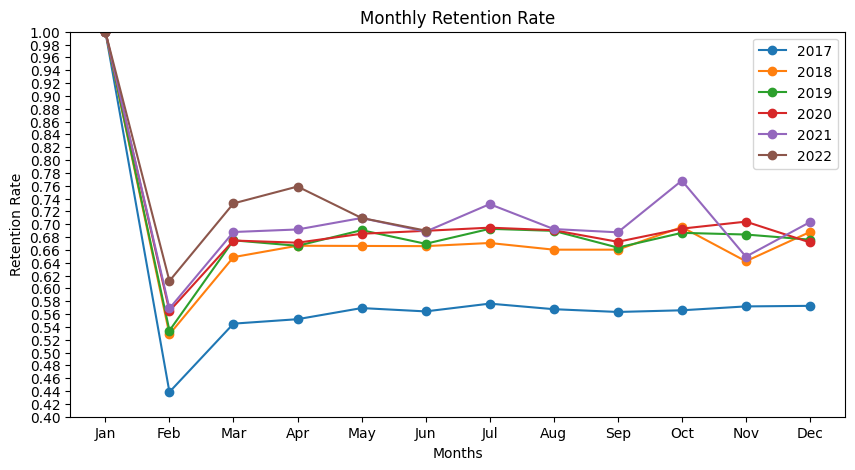

In [ ]:
def calculate_retention_rates(range0_customers, year):
    retention_rates = []
    for i in range(1, 13):
        start_date = pd.Timestamp(f'{year}-{i:02d}-01', tz='UTC')
        end_date = start_date + pd.DateOffset(months=1)

        range_customers = df[df['created_at'].between(start_date, end_date, inclusive='both')]['customer_id'].unique()
        retention_rate = len(set(range_customers).intersection(range0_customers)) / len(range0_customers)
        retention_rates.append(retention_rate)
    return retention_rates

years = [2017, 2018, 2019, 2020, 2021, 2022]
retention_rates_by_year = []

for year in years:
    range0_customers = df[df['created_at'].between(f'{year}-01-01', f'{year}-01-31', inclusive='both')]['customer_id'].unique()
    retention_rates = calculate_retention_rates(range0_customers, year)
    retention_rates_by_year.append(retention_rates)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))

for idx, year in enumerate(years):
    if year == 2022:
        plt.plot(months[:6], retention_rates_by_year[idx][:6], marker='o', label=str(year))
    else:
        plt.plot(months, retention_rates_by_year[idx], marker='o', label=str(year))

plt.xlabel('Months')
plt.ylabel('Retention Rate')
plt.title('Monthly Retention Rate')
plt.ylim(0.4, 1)
plt.yticks([i/50 for i in range(20, 51)])
plt.legend()
plt.show()

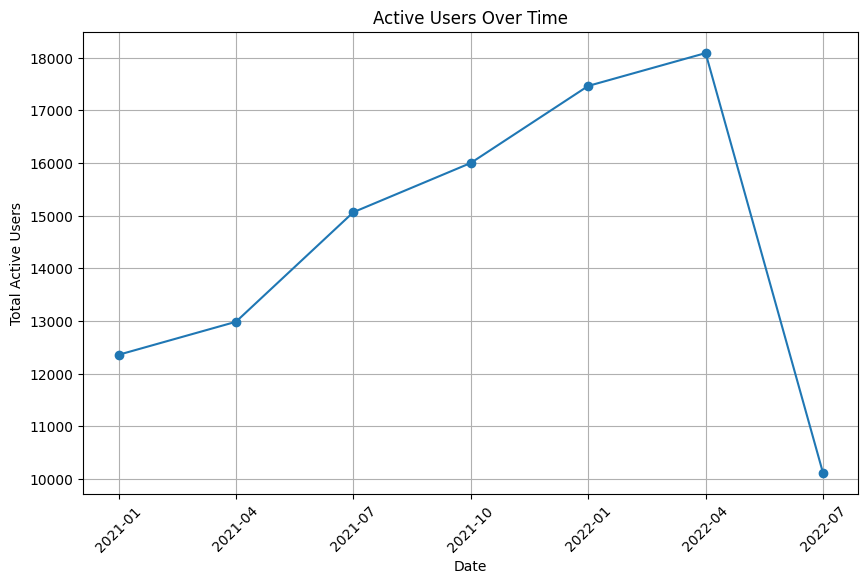

In [ ]:
import matplotlib.pyplot as plt

# 날짜 또는 레이블
dates = ['2021-01', '2021-04', '2021-07', '2021-10', '2022-01', '2022-04', '2022-07']

# 고객 수 데이터
total_customers = [total_customers_2101, total_customers_2104, total_customers_2107, total_customers_2110, total_customers_2201, total_customers_2204, total_customers_2207]

plt.figure(figsize=(10, 6))
plt.plot(dates, total_customers, marker='o')

plt.title('Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Total Active Users')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [ ]:
def combine_lists(*lists):
    combined_list = [element for lst in lists for element in lst]
    return combined_list

resurrected_22 = combine_lists(range0_resurrected_customers_2201, range0_resurrected_customers_2202, range0_resurrected_customers_2203, range0_resurrected_customers_2204,
                               range0_resurrected_customers_2205, range0_resurrected_customers_2206, range0_resurrected_customers_2207)

resurrected_df = transaction[transaction['customer_id'].isin(resurrected_22)]
print(len(resurrected_22))
resurrected_df_22 = resurrected_df[resurrected_df['created_at'].between('2022-01-01', '2022-07-31', inclusive='both')]
resurrected_df_22

631


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
2939,2022-01-03 00:41:51.577681+00:00,19664,e3d57738-e68c-4dbf-8bf5-ee5366c60e5d,2b2fc7f1-556a-4bd8-b4a0-3478c6978f76,Credit Card,Success,0,NaN,0,2022-01-08T19:45:43.543972Z,-7.623058,110.488824,158477,36887,1,158477
7885,2022-01-11 06:24:17.664175+00:00,65678,dfce682f-3afc-4873-b49b-6cb23ca5bfbd,3d897805-adab-4730-987d-6a8daa1f3f4a,Credit Card,Success,12263,SC2022,50000,2022-01-15T05:45:54.447435Z,-5.075881,105.662742,312867,6180,1,275130
8964,2022-01-13 06:59:16.148971+00:00,1530,62f03150-e1d7-4d3f-9caa-8ac53fea3756,214a88ad-08f3-4a8d-8b38-81660d043b2b,OVO,Success,0,NaN,10000,2022-01-19T01:52:55.017385Z,-0.443813,112.071740,242243,48572,1,232243
9557,2022-01-12 03:32:32.394259+00:00,85107,a6264a17-905f-4903-ab0f-312d56971e29,84aa38b5-cf42-4721-b20b-25f5bf93efeb,Gopay,Success,16740,SC2022,0,2022-01-14T19:37:35.424160Z,-1.956424,110.511208,221374,36888,1,238114
16218,2022-01-04 02:10:55.328063+00:00,1352,987bef66-4fcd-4163-b10d-d47e8161f891,dd49410d-73da-402f-87b5-7f22189116d1,Credit Card,Failed,2445,BUYMORE,10000,2022-01-06T04:32:05.614043Z,-0.795021,100.387620,162192,2684,1,154637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254070,2022-01-08 09:57:08.410042+00:00,94188,b49655e6-7370-4d23-a806-22d26c16ee47,1d1e7eb9-59ff-4ec6-9620-58e40dcb144c,Gopay,Success,8193,WEEKENDSERU,10000,2022-01-13T21:19:19.030370Z,-6.611223,110.773559,1046009,14359,1,613563
1254071,2022-01-08 09:57:08.410042+00:00,94188,b49655e6-7370-4d23-a806-22d26c16ee47,1d1e7eb9-59ff-4ec6-9620-58e40dcb144c,Gopay,Success,8193,WEEKENDSERU,10000,2022-01-13T21:19:19.030370Z,-6.611223,110.773559,1046009,28978,1,372840
1254072,2022-01-08 09:57:08.410042+00:00,94188,b49655e6-7370-4d23-a806-22d26c16ee47,1d1e7eb9-59ff-4ec6-9620-58e40dcb144c,Gopay,Success,8193,WEEKENDSERU,10000,2022-01-13T21:19:19.030370Z,-6.611223,110.773559,1046009,40317,1,57799
1254411,2022-01-10 14:21:58.710211+00:00,11318,51650fa9-cbbb-4f23-8d06-9c70e8397a9e,bef7abdc-bb58-4a59-b799-53b056d22218,OVO,Success,2508,AZ2022,0,2022-01-13T04:53:22.692535Z,-6.128235,106.968935,247551,27305,1,250059


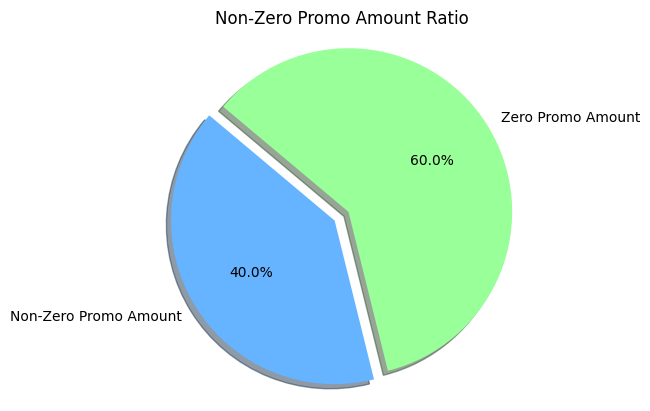

In [ ]:
# promo_amount 컬럼의 값이 0이 아닌 행의 개수를 세기
non_zero_promo_count = resurrected_df_22[resurrected_df_22["promo_amount"] != 0].shape[0]

# 전체 행의 개수를 구하기
total_rows = resurrected_df_22.shape[0]

# 0이 아닌 promo_amount 행의 비율 계산
non_zero_promo_ratio = non_zero_promo_count / total_rows

# 시각화
labels = ['Non-Zero Promo Amount', 'Zero Promo Amount']
sizes = [non_zero_promo_ratio, 1 - non_zero_promo_ratio]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)  # Non-Zero Promo Amount 부분을 조금 돌출해서 강조

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 원형 그래프 유지
plt.title('Non-Zero Promo Amount Ratio')
plt.show()

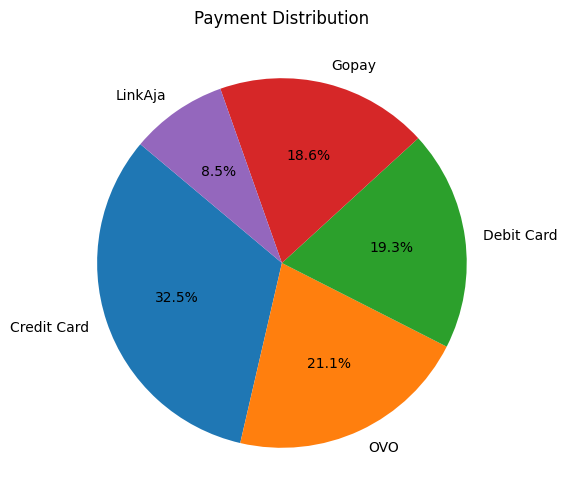

In [ ]:
# 'payment method' 열 값의 빈도 계산
payment_counts = resurrected_df_22['payment_method'].value_counts()

# 결제수단 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Distribution")
plt.show()

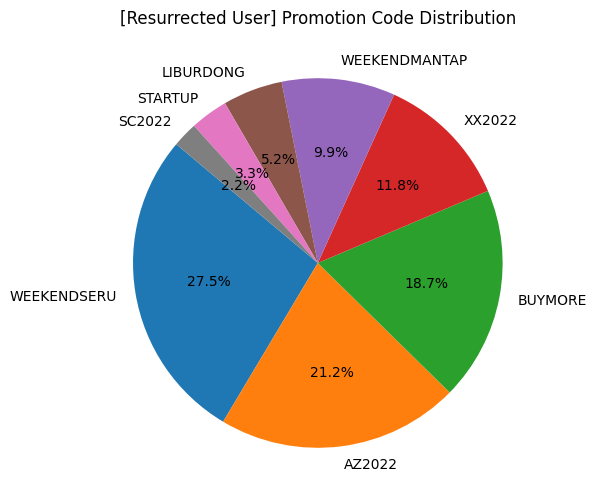

In [ ]:
# 'payment method' 열 값의 빈도 계산
payment_counts = resurrected_df_22['promo_code'].value_counts()

# 결제수단 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("[Resurrected User] Promotion Code Distribution")
plt.show()

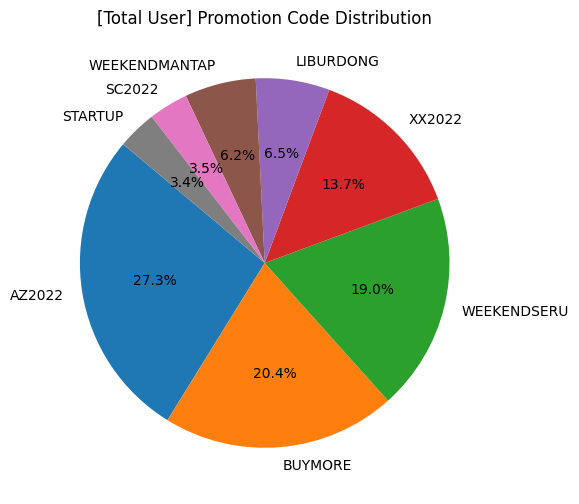

In [ ]:
# 'payment method' 열 값의 빈도 계산
payment_counts = df['promo_code'].value_counts()

# 결제수단 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("[Total User] Promotion Code Distribution")
plt.show()

In [ ]:
print(resurrected_df_22.total_amount.mean())
print(transaction.total_amount.mean())

927314.9273127753
1181573.7623022753


In [ ]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'username', 'email', 'gender',
       'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date'],
      dtype='object')

In [ ]:
from datetime import datetime

customer_drop = customer.drop(columns=['first_name', 'last_name', 'username', 'email', 'device_id', 'home_location_lat', 'home_location_long', 'home_country'])
customer_drop['birthdate'] = pd.to_datetime(customer_drop['birthdate'])
current_date = datetime(2022, 7, 1)
customer_drop['age'] = (current_date - customer_drop['birthdate']).dt.days // 365  # 일 수를 연 수로 변환
customer_drop

,customer_id,gender,birthdate,device_type,device_version,home_location,first_join_date,age
0,2870,F,1996-06-14,iOS,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,Sumatera Barat,2019-07-21,26
1,8193,F,1993-08-16,Android,Android 2.2.1,Jakarta Raya,2017-07-16,28
2,7279,M,1989-01-23,iOS,iPad; CPU iPad OS 4_2_1 like Mac OS X,Nusa Tenggara Barat,2020-08-23,33
3,88813,M,1991-01-05,iOS,iPad; CPU iPad OS 14_2 like Mac OS X,Kalimantan Timur,2021-10-03,31
4,82542,M,2000-07-15,iOS,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,Kalimantan Selatan,2021-04-11,21
...,...,...,...,...,...,...,...,...
99995,34743,M,2000-11-17,Android,Android 4.3.1,Lampung,2020-10-17,21
99996,72065,M,1998-03-30,Android,Android 8.0.0,Aceh,2017-11-25,24
99997,32818,F,1993-01-12,Android,Android 11,Maluku,2018-09-01,29
99998,75597,M,2000-09-13,Android,Android 7.1,Jambi,2020-05-31,21


In [ ]:
merged_resurrected = pd.merge(resurrected_df, customer_drop, on="customer_id")

In [ ]:
product_drop = product[['id', 'gender', 'usage', 'season']]
product_drop.rename(columns={'id': 'product_id'}, inplace=True)
merged_resurrected = pd.merge(merged_resurrected, product_drop, on="product_id")

<ipython-input-33-2f77cdf26a45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_drop.rename(columns={'id': 'product_id'}, inplace=True)


In [ ]:
# 나이 범주 분류 함수
def categorize_age(age):
    if age >= 10 and age < 20:
        return "Teenager"
    elif age >= 20 and age < 23:
        return "Early 20s"
    elif age >= 23 and age < 27:
        return "Mid 20s"
    elif age >= 27 and age < 30:
        return "Late 20s"
    elif age >= 30 and age < 33:
        return "Early 30s"
    elif age >= 33 and age < 37:
        return "Mid 30s"
    elif age >= 37 and age < 40:
        return "Late 30s"
    elif age >= 40 and age < 50:
        return "40s"
    elif age >= 50:
        return "50s"
    else:
        return "N/A"

# 나이 범주 컬럼 추가
merged_resurrected['age_category'] = merged_resurrected['age'].apply(categorize_age)
merged_resurrected

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,birthdate,device_type,device_version,home_location,first_join_date,age,gender_y,usage,season,age_category
0,2018-07-28 14:05:53.577681+00:00,19664,147f8d12-5818-408f-b6b3-535c3dd98c4d,9b458e69-ac13-42d2-ba2b-219f210c24a4,Credit Card,Success,2224,WEEKENDMANTAP,10000,2018-07-30T22:42:13.362454Z,...,2003-02-22,Android,Android 4.4.2,Jawa Tengah,2018-07-28,19,Men,Casual,Summer,Teenager
1,2018-07-28 14:05:53.577681+00:00,19664,147f8d12-5818-408f-b6b3-535c3dd98c4d,9b458e69-ac13-42d2-ba2b-219f210c24a4,Credit Card,Success,2224,WEEKENDMANTAP,10000,2018-07-30T22:42:13.362454Z,...,2003-02-22,Android,Android 4.4.2,Jawa Tengah,2018-07-28,19,Unisex,Casual,Fall,Teenager
2,2019-02-22 15:16:40.577681+00:00,19664,a96c4e09-7e53-4a56-a3e1-a31bc3223f52,b882b490-52f7-4995-b97e-cd65ee404ca4,Credit Card,Success,0,NaN,10000,2019-02-25T16:51:50.502638Z,...,2003-02-22,Android,Android 4.4.2,Jawa Tengah,2018-07-28,19,Men,Casual,Summer,Teenager
3,2019-09-19 16:17:33.577681+00:00,19664,57e981ff-9d64-4f26-a420-b1e07a2f2c9e,278c9346-ee2f-4575-acee-b835b0523146,Credit Card,Success,0,NaN,0,2019-09-22T23:04:18.506873Z,...,2003-02-22,Android,Android 4.4.2,Jawa Tengah,2018-07-28,19,Women,Casual,Summer,Teenager
4,2020-04-15 17:39:17.577681+00:00,19664,648c3721-4cf0-4dab-87b7-3f6bc13c5053,173e6a02-9703-4df1-b76c-39cc16fee6ed,Credit Card,Success,0,NaN,0,2020-04-20T23:08:54.466675Z,...,2003-02-22,Android,Android 4.4.2,Jawa Tengah,2018-07-28,19,Men,Casual,Summer,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,2021-06-22 08:46:23.710211+00:00,11318,15c1fe62-3cfb-47c8-9141-36d410cdba71,80999cc4-e2bb-4e72-92b5-96d492d4bc7b,LinkAja,Success,5178,AZ2022,15000,2021-06-27T13:09:18.889816Z,...,1993-11-14,Android,Android 4.1.1,Jakarta Raya,2020-12-01,28,Men,Formal,Summer,Late 20s
5298,2022-01-10 14:21:58.710211+00:00,11318,51650fa9-cbbb-4f23-8d06-9c70e8397a9e,bef7abdc-bb58-4a59-b799-53b056d22218,OVO,Success,2508,AZ2022,0,2022-01-13T04:53:22.692535Z,...,1993-11-14,Android,Android 4.1.1,Jakarta Raya,2020-12-01,28,Men,Casual,Spring,Late 20s
5299,2020-05-13 19:17:26.359304+00:00,64772,9003bf28-afba-4881-8edd-b05f2ce0d652,e46d55c9-032c-4bfc-b469-8caa3ff499d2,OVO,Success,3981,BUYMORE,0,2020-05-19T09:40:17.878411Z,...,1992-12-19,Android,Android 2.2,Jawa Tengah,2020-05-13,29,Men,Ethnic,Summer,Late 20s
5300,2020-12-02 00:10:25.359304+00:00,64772,98206a95-8095-45ec-90fe-701df7b1b654,2b726afb-7a89-4dbc-94c5-342c77b5fd10,OVO,Success,0,NaN,10000,2020-12-07T15:49:19.440041Z,...,1992-12-19,Android,Android 2.2,Jawa Tengah,2020-05-13,29,Women,Casual,Summer,Late 20s


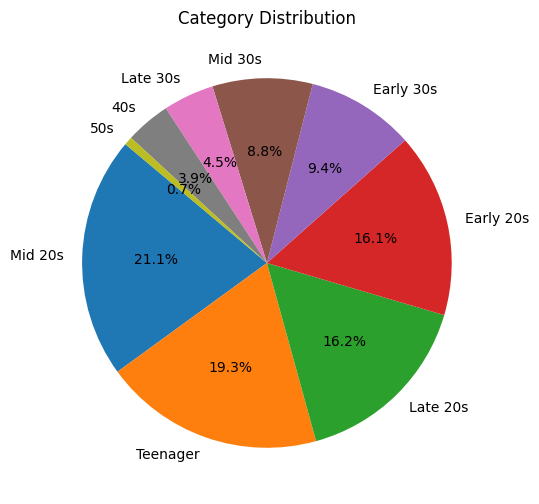

Mid 20s      1120
Teenager     1022
Late 20s      857
Early 20s     854
Early 30s     501
Mid 30s       464
Late 30s      236
40s           209
50s            39
Name: age_category, dtype: int64


In [ ]:
# 'masterCategory' 열 값의 빈도 계산
category_counts = merged_resurrected['age_category'].value_counts()

# 카테코리 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")
plt.show()
print(category_counts)

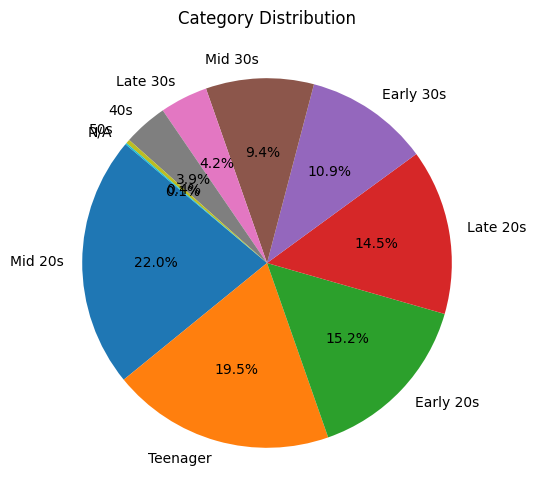

Mid 20s      275711
Teenager     244428
Early 20s    190422
Late 20s     181614
Early 30s    136358
Mid 30s      118465
Late 30s      52444
40s           48404
50s            4521
N/A            1599
Name: age_category, dtype: int64


In [ ]:
merged_transaction = pd.merge(transaction, customer_drop, on="customer_id")
merged_transaction = pd.merge(merged_transaction, product_drop, on="product_id")
merged_transaction['age_category'] = merged_transaction['age'].apply(categorize_age)

# 'masterCategory' 열 값의 빈도 계산
category_counts = merged_transaction['age_category'].value_counts()

# 카테코리 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")
plt.show()
print(category_counts)

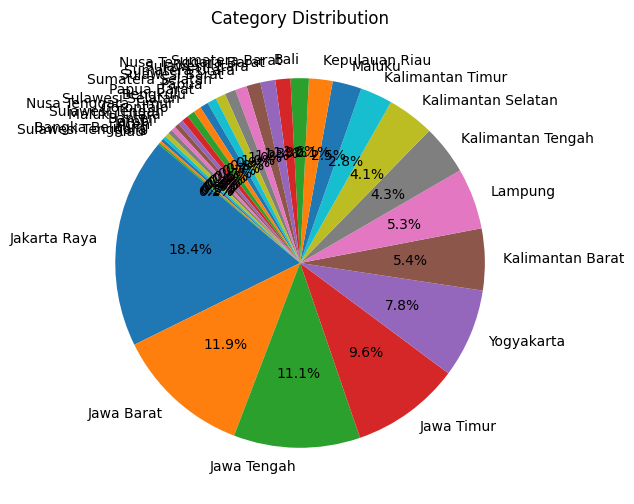

Jakarta Raya           230787
Jawa Barat             149146
Jawa Tengah            138829
Jawa Timur             119900
Yogyakarta              97664
Kalimantan Barat        67762
Lampung                 66938
Kalimantan Tengah       54459
Kalimantan Selatan      51655
Kalimantan Timur        35308
Maluku                  31798
Kepulauan Riau          25978
Bali                    20027
Sumatera Barat          16533
Nusa Tenggara Barat     16308
Sulawesi Utara          15379
Sumatera Utara          12850
Sulawesi Barat          12004
Sumatera Selatan        10929
Papua                   10131
Papua Barat              9079
Bengkulu                 8543
Sulawesi Selatan         8313
Nusa Tenggara Timur      7376
Gorontalo                5428
Sulawesi Tengah          5117
Maluku Utara             4915
Banten                   4783
Jambi                    4706
Aceh                     3620
Bangka Belitung          3351
Sulawesi Tenggara        2484
Riau                     1866
Name: home

In [ ]:
# 'masterCategory' 열 값의 빈도 계산
category_counts = merged_transaction['home_location'].value_counts()

# 카테코리 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")
plt.show()
print(category_counts)

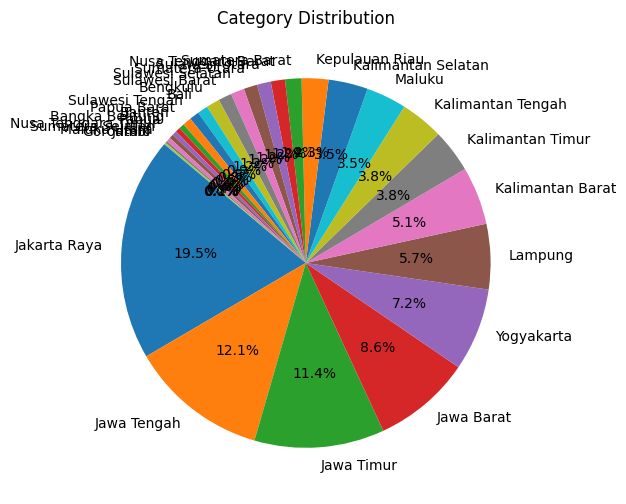

Jakarta Raya           1036
Jawa Tengah             641
Jawa Timur              603
Jawa Barat              455
Yogyakarta              383
Lampung                 303
Kalimantan Barat        269
Kalimantan Timur        201
Kalimantan Tengah       200
Maluku                  187
Kalimantan Selatan      183
Kepulauan Riau          124
Sumatera Barat           76
Nusa Tenggara Barat      66
Sulawesi Utara           64
Sumatera Utara           63
Sulawesi Selatan         63
Sulawesi Barat           62
Bengkulu                 62
Bali                     49
Sulawesi Tengah          45
Papua Barat              41
Banten                   25
Bangka Belitung          22
Papua                    21
Nusa Tenggara Timur      20
Sumatera Selatan         19
Maluku Utara             10
Gorontalo                 7
Jambi                     2
Name: home_location, dtype: int64


In [ ]:
# 'masterCategory' 열 값의 빈도 계산
category_counts = merged_resurrected['home_location'].value_counts()

# 카테코리 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")
plt.show()
print(category_counts)

In [ ]:
dormant_recent = set(range0_current_customers_2201).symmetric_difference(set(range0_current_customers_2207)) | set(range0_current_customers_2202).symmetric_difference(set(range0_current_customers_2207)) | set(range0_current_customers_2203).symmetric_difference(set(range0_current_customers_2207)) | set(range0_current_customers_2204).symmetric_difference(set(range0_current_customers_2207)) | set(range0_current_customers_2205).symmetric_difference(set(range0_current_customers_2207)) | set(range0_current_customers_2206).symmetric_difference(set(range0_current_customers_2207))
recent = transaction[transaction['customer_id'].isin(dormant_recent)]
merged_recent = pd.merge(recent, customer_drop, on="customer_id")
merged_recent = pd.merge(merged_recent, product_drop, on="product_id")
merged_recent['age_category'] = merged_recent['age'].apply(categorize_age)
merged_recent = merged_recent[~merged_recent['customer_id'].isin(range0_current_customers_2201)]

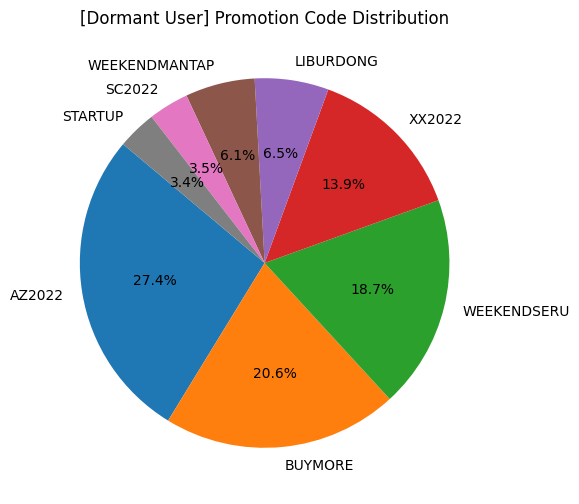

In [ ]:
# 'payment method' 열 값의 빈도 계산
payment_counts = merged_recent['promo_code'].value_counts()

# 결제수단 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("[Dormant User] Promotion Code Distribution")
plt.show()

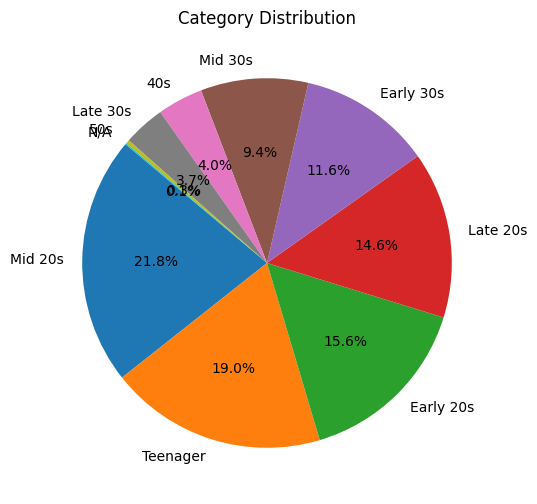

Mid 20s      49731
Teenager     43342
Early 20s    35721
Late 20s     33325
Early 30s    26488
Mid 30s      21504
40s           9114
Late 30s      8350
50s            760
N/A            234
Name: age_category, dtype: int64


In [ ]:
# 'masterCategory' 열 값의 빈도 계산
category_counts = merged_recent['age_category'].value_counts()

# 카테코리 비율 시각화
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")
plt.show()
print(category_counts)

In [ ]:
merged_tt = pd.merge(click_tt, transaction, on="session_id")
merged_tt

,event_time,event_id,session_id,used,created_at,customer_id,booking_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2022-07-24 13:16:37.038087+00:00,e599d7c6-cc51-407b-b8c5-20545cce6cbd,00007415-e0e7-4a33-95e8-5bc749016876,1,2022-07-24 13:16:40.038087+00:00,78259,40ea0d95-28d5-4299-9b7a-2ea25435689e,Credit Card,Success,0,NaN,0,2022-07-27T11:35:25.298016Z,-8.189509,110.830499,195528,41309,1,195528
1,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0000b1a6-8dca-4fb3-b1db-ccde1791a330,1,2021-02-10 00:23:22.386424+00:00,8544,cfb90f77-9cb6-405c-9c22-f0fd7bb5817f,Gopay,Success,0,NaN,25000,2021-02-12T03:14:32.046644Z,-6.170157,106.759280,172017,19353,1,147017
2,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,00011e77-643b-49ba-b09d-c5a64f7683b4,1,2018-05-26 01:56:59.211903+00:00,42813,7ec975ed-3c87-4b81-99a5-581684783131,OVO,Success,0,NaN,0,2018-05-28T12:58:20.136780Z,-7.664595,109.775443,844206,13044,2,422103
3,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1,2020-02-16 22:33:24.777605+00:00,90162,ab618799-1999-4939-83b9-848c25a60b73,Credit Card,Success,0,NaN,10000,2020-02-19T23:18:55.930933Z,0.888174,123.236283,429328,5998,1,419328
4,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1,2020-02-16 22:33:24.777605+00:00,90162,ab618799-1999-4939-83b9-848c25a60b73,Credit Card,Success,0,NaN,10000,2020-02-19T23:18:55.930933Z,0.888174,123.236283,429328,5998,1,419328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326589,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1,2019-10-05 12:35:22.933551+00:00,8649,54294163-004a-4d0e-9e2f-60c1a7f9d7e3,Credit Card,Success,0,NaN,10000,2019-10-06T14:30:37.099657Z,-7.408741,110.302108,818023,22066,1,128412
326590,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1,2019-10-05 12:35:22.933551+00:00,8649,54294163-004a-4d0e-9e2f-60c1a7f9d7e3,Credit Card,Success,0,NaN,10000,2019-10-06T14:30:37.099657Z,-7.408741,110.302108,818023,34653,2,226469
326591,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1,2019-10-05 12:35:22.933551+00:00,8649,54294163-004a-4d0e-9e2f-60c1a7f9d7e3,Credit Card,Success,0,NaN,10000,2019-10-06T14:30:37.099657Z,-7.408741,110.302108,818023,7498,1,226673
326592,2020-11-07 18:03:13.117552+00:00,cb250f48-5ee9-40c7-a8a8-b54a9a357def,ffffdf8e-dea1-42bc-9839-7662675c0d38,1,2020-11-11 14:59:29.117552+00:00,65771,e8719fb1-e8ad-4489-8961-eb6956c2191d,Credit Card,Success,0,NaN,10000,2020-11-14T14:57:17.660833Z,-6.149636,106.706806,359771,22290,1,349771


In [ ]:
dormant_tt = merged_tt[merged_tt['customer_id'].isin(dormant_recent)]
dormant_tt

,event_time,event_id,session_id,used,created_at,customer_id,booking_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
18,2019-08-16 14:43:54.025519+00:00,69523e48-7a14-49c2-8183-4907357b8669,0002b514-75f2-457e-a6a5-bc50bbdc1fe1,1,2019-08-21 15:06:39.025519+00:00,27466,f5ad0392-d78e-44b0-9a58-d6dd44345fa1,OVO,Success,0,NaN,10000,2019-08-24T11:07:24.071520Z,-7.231475,111.627489,1340656,48503,6,221776
19,2019-03-10 14:49:39.375138+00:00,6287b1f3-5386-49e8-9d31-8a566e97bc2c,0002d4fd-9985-4fd6-a15a-d3847d19a0c9,1,2019-03-12 03:55:31.375138+00:00,91166,886bb0c6-9403-4fed-945e-ebfee962d3e4,OVO,Success,7024,SC2022,10000,2019-03-15T04:33:44.137373Z,-6.254479,106.783144,839423,52428,1,140157
20,2019-03-10 14:49:39.375138+00:00,6287b1f3-5386-49e8-9d31-8a566e97bc2c,0002d4fd-9985-4fd6-a15a-d3847d19a0c9,1,2019-03-12 03:55:31.375138+00:00,91166,886bb0c6-9403-4fed-945e-ebfee962d3e4,OVO,Success,7024,SC2022,10000,2019-03-15T04:33:44.137373Z,-6.254479,106.783144,839423,36255,1,450815
21,2019-03-10 14:49:39.375138+00:00,6287b1f3-5386-49e8-9d31-8a566e97bc2c,0002d4fd-9985-4fd6-a15a-d3847d19a0c9,1,2019-03-12 03:55:31.375138+00:00,91166,886bb0c6-9403-4fed-945e-ebfee962d3e4,OVO,Success,7024,SC2022,10000,2019-03-15T04:33:44.137373Z,-6.254479,106.783144,839423,2150,1,245475
34,2018-06-19 16:45:01.802296+00:00,2605340f-5170-4e42-816b-bb3b97363d56,00058dfc-08c3-45d3-be96-3a2bbf294c74,1,2018-06-19 19:16:50.802296+00:00,16391,6899f1cb-6b22-432c-9d85-880ff2c3f438,Credit Card,Success,11095,STARTUP,5000,2018-06-23T01:16:44.573881Z,-7.205406,108.309426,476842,16530,1,482937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326581,2021-12-31 00:43:07.541124+00:00,2af3a20d-fa49-49cf-ab16-eefd0160013e,fffd5e21-ff89-4c97-8fe5-5d59520d0699,1,2022-01-05 21:57:55.541124+00:00,71457,137e53f1-ef87-400c-a69b-4f592564b829,Credit Card,Failed,0,NaN,0,2022-01-08T22:27:42.775095Z,-4.549225,105.439242,212189,50401,1,212189
326582,2022-04-21 23:02:32.711463+00:00,5511c5a3-3353-4f18-936b-174ad0676d38,fffe0edc-392a-49c1-911c-451c14cb0298,1,2022-04-22 04:19:36.711463+00:00,121,5cd98a42-3fd0-417d-8fad-c44e8ce566f3,Credit Card,Success,6685,BUYMORE,10000,2022-04-26T08:20:49.477287Z,-7.036948,106.676427,313863,15819,1,310548
326583,2022-05-22 21:20:06.951998+00:00,7a721cab-d811-4b1d-9e0a-9d8f2c26cf8e,fffe5ead-3b3d-442b-9b1d-99c91412e8f5,1,2022-06-06 16:36:53.951998+00:00,83838,39528725-55c9-4500-b80f-3fc8b7d717cf,Credit Card,Success,4090,BUYMORE,10000,2022-06-10T19:12:46.586626Z,-7.182426,108.902704,321326,39207,2,157708
326586,2017-12-25 14:25:43.431409+00:00,2096555f-2df5-4ac4-9842-0f3de89e14f9,ffff153d-ae1f-4fe2-af05-f2803580b5e4,1,2018-02-19 18:31:13.431409+00:00,10455,7fa2a225-45b8-4853-bb9c-dbaa59552e99,Debit Card,Success,4366,BUYMORE,0,2018-02-24T20:41:34.986342Z,-8.228250,111.728291,576773,18629,3,193713


In [ ]:
current_tt = merged_tt[merged_tt['customer_id'].isin(range0_current_customers_2207)]
current_tt

,event_time,event_id,session_id,used,created_at,customer_id,booking_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
1,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0000b1a6-8dca-4fb3-b1db-ccde1791a330,1,2021-02-10 00:23:22.386424+00:00,8544,cfb90f77-9cb6-405c-9c22-f0fd7bb5817f,Gopay,Success,0,NaN,25000,2021-02-12T03:14:32.046644Z,-6.170157,106.759280,172017,19353,1,147017
2,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,00011e77-643b-49ba-b09d-c5a64f7683b4,1,2018-05-26 01:56:59.211903+00:00,42813,7ec975ed-3c87-4b81-99a5-581684783131,OVO,Success,0,NaN,0,2018-05-28T12:58:20.136780Z,-7.664595,109.775443,844206,13044,2,422103
3,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1,2020-02-16 22:33:24.777605+00:00,90162,ab618799-1999-4939-83b9-848c25a60b73,Credit Card,Success,0,NaN,10000,2020-02-19T23:18:55.930933Z,0.888174,123.236283,429328,5998,1,419328
4,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1,2020-02-16 22:33:24.777605+00:00,90162,ab618799-1999-4939-83b9-848c25a60b73,Credit Card,Success,0,NaN,10000,2020-02-19T23:18:55.930933Z,0.888174,123.236283,429328,5998,1,419328
5,2020-02-14 08:38:35.777605+00:00,8a7ea7b1-6d50-4a43-9f6b-8e5ad7918612,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1,2020-02-16 22:33:24.777605+00:00,90162,ab618799-1999-4939-83b9-848c25a60b73,Credit Card,Success,0,NaN,10000,2020-02-19T23:18:55.930933Z,0.888174,123.236283,429328,5998,1,419328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326589,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1,2019-10-05 12:35:22.933551+00:00,8649,54294163-004a-4d0e-9e2f-60c1a7f9d7e3,Credit Card,Success,0,NaN,10000,2019-10-06T14:30:37.099657Z,-7.408741,110.302108,818023,22066,1,128412
326590,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1,2019-10-05 12:35:22.933551+00:00,8649,54294163-004a-4d0e-9e2f-60c1a7f9d7e3,Credit Card,Success,0,NaN,10000,2019-10-06T14:30:37.099657Z,-7.408741,110.302108,818023,34653,2,226469
326591,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1,2019-10-05 12:35:22.933551+00:00,8649,54294163-004a-4d0e-9e2f-60c1a7f9d7e3,Credit Card,Success,0,NaN,10000,2019-10-06T14:30:37.099657Z,-7.408741,110.302108,818023,7498,1,226673
326592,2020-11-07 18:03:13.117552+00:00,cb250f48-5ee9-40c7-a8a8-b54a9a357def,ffffdf8e-dea1-42bc-9839-7662675c0d38,1,2020-11-11 14:59:29.117552+00:00,65771,e8719fb1-e8ad-4489-8961-eb6956c2191d,Credit Card,Success,0,NaN,10000,2020-11-14T14:57:17.660833Z,-6.149636,106.706806,359771,22290,1,349771


In [ ]:
click_tt

,event_time,event_id,session_id,used
0,2022-07-24 13:16:37.038087+00:00,e599d7c6-cc51-407b-b8c5-20545cce6cbd,00007415-e0e7-4a33-95e8-5bc749016876,1
1,2021-02-08 06:31:46.386424+00:00,bf979aa8-67f2-4639-adfb-6cddbf25dccb,0000b1a6-8dca-4fb3-b1db-ccde1791a330,1
2,2018-05-25 22:40:31.211903+00:00,7acacdd8-9d65-4d51-9ac0-3d828fd86b6d,00011e77-643b-49ba-b09d-c5a64f7683b4,1
3,2020-02-13 03:41:13.777605+00:00,46290a42-6762-4eaa-8eef-c69bdb3bd413,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1
4,2020-02-13 14:30:48.777605+00:00,ce57b770-5552-44f1-bff8-1d6e37e24118,00013ac1-f66e-492c-ac04-4e0f1ecf2ff8,1
...,...,...,...,...
224877,2017-12-25 14:25:43.431409+00:00,2096555f-2df5-4ac4-9842-0f3de89e14f9,ffff153d-ae1f-4fe2-af05-f2803580b5e4,1
224878,2017-03-30 03:05:32.013557+00:00,3bfe6884-fc57-480f-85f1-b9cb23740a43,ffff284a-9364-4296-a758-e3b0b4297f6d,1
224879,2019-10-01 22:19:22.933551+00:00,73605d43-abe1-49cb-8a2c-876322f5b11f,ffff633b-91cf-45f8-b9f7-768ad414d3b1,1
224880,2020-11-07 18:03:13.117552+00:00,cb250f48-5ee9-40c7-a8a8-b54a9a357def,ffffdf8e-dea1-42bc-9839-7662675c0d38,1


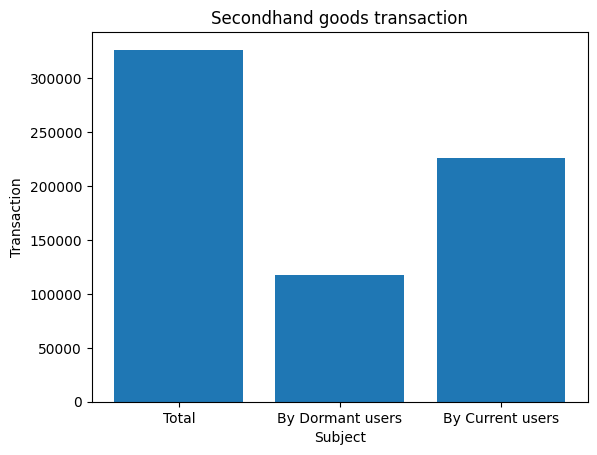

In [ ]:
total = len(merged_tt)
by_dormant_users = len(dormant_tt)
by_current_users = len(current_tt)

# 시각화
datasets = ['Total', 'By Dormant users', 'By Current users']
row_counts = [total, by_dormant_users, by_current_users]

plt.bar(datasets, row_counts)
plt.xlabel('Subject')
plt.ylabel('Transaction')
plt.title('Secondhand goods transaction')
plt.show()